In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import kruskal, mannwhitneyu
from statsmodels.stats.multitest import multipletests

df = pd.read_excel('/Users/mac/Desktop/учеба/проект/avito_advanced_data.xlsx')
df

,Unnamed: 0,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,gender,age,price,contacts,favorites,sentiment,activity,sentiment_group,activity_square,sentiment_square
0,0,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,...,М,4.0,5,3,4,1.000000,0.28,positive,0.0784,1.000000
1,1,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,...,Ж,NaN,655,0,0,0.999089,0.00,positive,0.0000,0.998179
2,2,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,...,М,36.0,0,0,0,0.997077,0.00,positive,0.0000,0.994163
3,3,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,...,Ж,NaN,-1,1,1,0.997066,0.08,positive,0.0064,0.994141
4,4,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,...,Ж,NaN,8000,0,0,0.995826,0.00,positive,0.0000,0.991670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,49968,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",...,Ж,48.0,3000,1,1,-0.673896,0.08,negative,0.0064,0.454135
49969,49969,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,...,Ж,NaN,1500,1,3,-0.710234,0.16,negative,0.0256,0.504433
49970,49970,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",...,Ж,36.0,0,0,1,-0.714857,0.50,negative,0.2500,0.511020
49971,49971,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,...,Ж,108.0,0,0,0,-0.876198,0.00,negative,0.0000,0.767724


In [58]:
def outlier(df, col):
    f_b = df[col].quantile(0.25)
    s_b = df[col].quantile(0.75)
    iqr = s_b - f_b
    lower = f_b - 3 * iqr
    higher = s_b + 3 * iqr
    df_filtered = df[(df[col] >= lower) & (df[col] <= higher)].copy() 
    return df_filtered

In [ ]:
from scipy.special import betainc

def qp(X, p):
    n = len(X)
    ordered_stats = np.sort(X)
    index = (n + 1) * p
    j = int(np.floor(index))
    g = index - j
    W_n = np.zeros(n)
    
    for i in range(n):
        W_n[i] = betainc((n + 1) * p, (n + 1) * (1 - p), (i + 1) / n)
    Q_p = np.sum(W_n * ordered_stats)
    
    return Q_p


print(qp(df['sentiment'], 0.25))



def classify(score):
        q25 = -0.05304310377687216
        q75 = 0.1511594504117966
        if score <= q25:
            return 'negative'
        elif score >= q75:
            return 'positive'
        else:
            return 'neutral'


        

5098.1577827779465


In [13]:
def classify(score):
        q25 = -0.05304310377687216
        q75 = 0.1511594504117966
        if score <= q25:
            return 'negative'
        elif score >= q75:
            return 'positive'
        else:
            return 'neutral'
        


In [14]:
df['sentiment_group'] = df['sentiment'].apply(classify)

In [61]:
df

,Unnamed: 0,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,gender,age,price,contacts,favorites,sentiment,activity,sentiment_group,activity_square,sentiment_square
0,0,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,...,М,4.0,5,3,4,1.000000,0.28,positive,0.0784,1.000000
1,1,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,...,Ж,NaN,655,0,0,0.999089,0.00,positive,0.0000,0.998179
2,2,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,...,М,36.0,0,0,0,0.997077,0.00,positive,0.0000,0.994163
3,3,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,...,Ж,NaN,-1,1,1,0.997066,0.08,positive,0.0064,0.994141
4,4,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,...,Ж,NaN,8000,0,0,0.995826,0.00,positive,0.0000,0.991670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,49968,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",...,Ж,48.0,3000,1,1,-0.673896,0.08,negative,0.0064,0.454135
49969,49969,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,...,Ж,NaN,1500,1,3,-0.710234,0.16,negative,0.0256,0.504433
49970,49970,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",...,Ж,36.0,0,0,1,-0.714857,0.50,negative,0.2500,0.511020
49971,49971,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,...,Ж,108.0,0,0,0,-0.876198,0.00,negative,0.0000,0.767724


In [78]:
df['check_gr'] = pd.qcut(df['sentiment'], q=3, labels=False)
df

,Unnamed: 0,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,age,price,contacts,favorites,sentiment,activity,sentiment_group,activity_square,sentiment_square,check_gr
0,0,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,...,4.0,5,3,4,1.000000,0.28,positive,0.0784,1.000000,2
1,1,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,...,NaN,655,0,0,0.999089,0.00,positive,0.0000,0.998179,2
2,2,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,...,36.0,0,0,0,0.997077,0.00,positive,0.0000,0.994163,2
3,3,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,...,NaN,-1,1,1,0.997066,0.08,positive,0.0064,0.994141,2
4,4,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,...,NaN,8000,0,0,0.995826,0.00,positive,0.0000,0.991670,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,49968,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",...,48.0,3000,1,1,-0.673896,0.08,negative,0.0064,0.454135,0
49969,49969,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,...,NaN,1500,1,3,-0.710234,0.16,negative,0.0256,0.504433,0
49970,49970,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",...,36.0,0,0,1,-0.714857,0.50,negative,0.2500,0.511020,0
49971,49971,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,...,108.0,0,0,0,-0.876198,0.00,negative,0.0000,0.767724,0


In [69]:
df['check_gr'].value_counts()

check_gr
1    16658
0    16658
2    16657
Name: count, dtype: int64

In [71]:
neu = df[df['check_gr'] == 1]
neu['sentiment'].describe()

count    16658.000000
mean         0.031374
std          0.033332
min         -0.021922
25%          0.002905
50%          0.027281
75%          0.058434
max          0.098249
Name: sentiment, dtype: float64

In [154]:
neu_new = df[df['sentiment_group'] == 'neutral']
neu_new

,Unnamed: 0,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,price,contacts,favorites,sentiment,activity,sentiment_group,activity_square,sentiment_square,check_gr,sentiment_newgroup
12498,12498,Собаки,12,False,5,Собака,6,72,13,"Щенки, 3 девочки возраст около 2 мес ищут дом,...",...,-1,0,0,0.151140,0.000000,neutral,0.000000,0.022843,positive,positive
12499,12499,Собаки,17,False,8,Чихуахуа щенок,14,408,49,У нашего трёхмесячного щеночка\n\n -родители с...,...,150,58,82,0.151109,8.235294,neutral,67.820069,0.022834,positive,positive
12500,12500,Кошки,25,False,1,Котёнок,7,143,26,"Котёнок 2-3 месяца, очень ласковый и умный кот...",...,0,1,6,0.151109,0.280000,neutral,0.078400,0.022834,positive,positive
12501,12501,Собаки,16,True,5,Черно-подпалые щенки цвергпинчера,33,730,91,"Девочка и мальчики цвергпинчера, с хорошим кос...",...,-1,6,7,0.151109,0.812500,neutral,0.660156,0.022834,positive,positive
12502,12502,Собаки,15,False,1,Собака в добрые руки отдам бесплатно щенки,42,138,19,Только в добрые руки. Щенки 3 месяца. Девочка ...,...,0,2,10,0.151109,0.800000,neutral,0.640000,0.022834,positive,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37474,37474,Собаки,13,False,9,Собака,6,129,57,"Собака русский той, девочка. 1,5 года, с паспо...",...,8000,0,1,-0.053023,0.076923,neutral,0.005917,0.002811,negative,negative
37475,37475,Собаки,25,False,3,Щенок пудель шпиц,17,397,53,Продам щенка (девочку) шпицепу.\nЭто популярна...,...,14500,20,65,-0.053023,3.400000,neutral,11.560000,0.002811,negative,negative
37476,37476,Кошки,25,False,5,Котик лапочка,13,227,63,"ИЩЕМ КОТИКУ ДОМ! 💚\n\n😻Котик Брют, молодой, пр...",...,0,2,5,-0.053023,0.280000,neutral,0.078400,0.002811,negative,negative
37477,37477,Собаки,25,False,4,Эмма в поисках дома,19,777,111,Ну ведь должно же когда-нибудь повезти!!!_x000...,...,0,0,0,-0.053023,0.000000,neutral,0.000000,0.002811,negative,negative


In [155]:
neu_new['sentiment'].describe()

count    24981.000000
mean         0.035279
std          0.054475
min         -0.053023
25%         -0.008058
50%          0.027209
75%          0.076877
max          0.151140
Name: sentiment, dtype: float64

In [5]:
import scipy.stats as stats
import scikit_posthocs as sp

In [63]:
df_hui = outlier(df, 'activity')

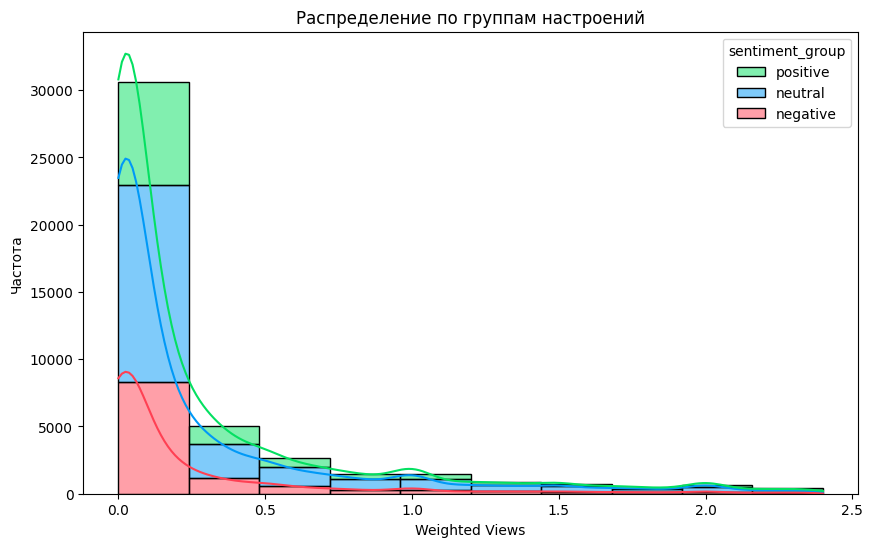

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_hui, x='activity', hue='sentiment_group', palette=['#04E061','#0099F7','#FF4053'], kde=True, bins=10, multiple='stack')
plt.title('Распределение по группам настроений')
plt.xlabel('Weighted Views')
plt.ylabel('Частота')
plt.show()

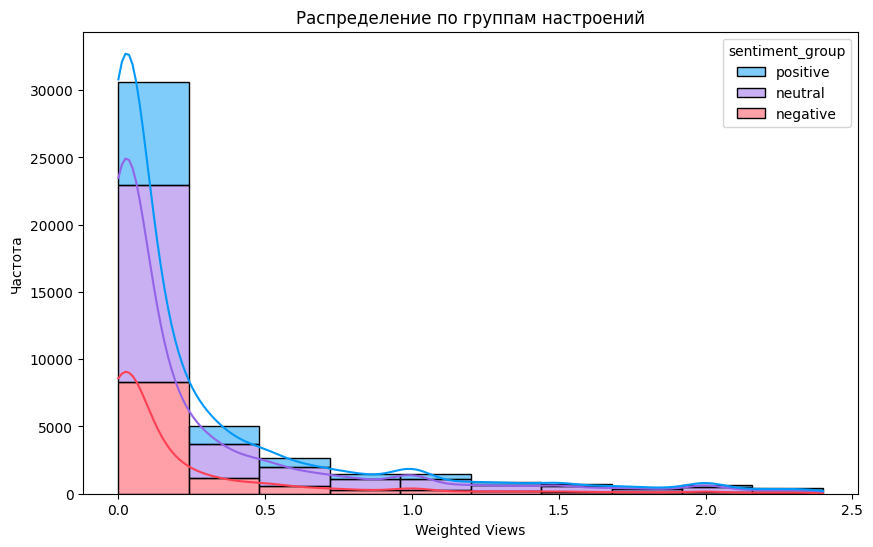

In [175]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_hui, x='activity', hue='sentiment_group', palette=['#0099f7','#9363e8','#FF4053'], kde=True, bins=10, multiple='stack')
plt.title('Распределение по группам настроений')
plt.xlabel('Weighted Views')
plt.ylabel('Частота')
plt.show()

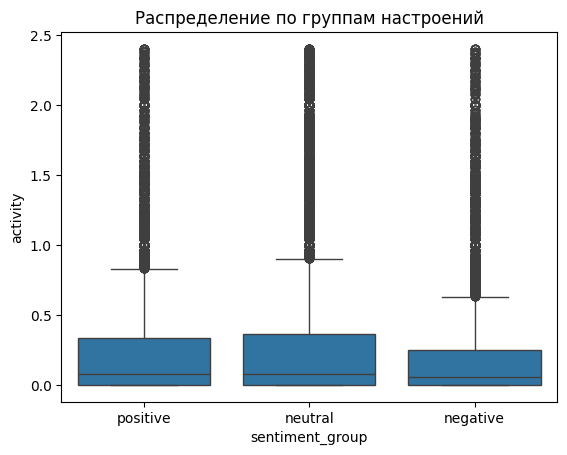

In [11]:
sns.boxplot(x='sentiment_group', y='activity', data=df_hui)
plt.title('Распределение по группам настроений')
plt.show()

In [7]:
from scipy.stats import rankdata

In [11]:
def check_reliability(df):
    print(df['sentiment_group'].value_counts())

    for group in df['sentiment_group'].unique():
        stat, p_value = stats.shapiro(df[df['sentiment_group'] == group]['activity'])
        print(f'Группа {group}: p-значение = {p_value}')

    if p_value > 0.05:
        print('Не отвергаем нулевую гипотезу: распределение нормальное.')
    else:
        print('Отвергаем нулевую гипотезу: распределение ненормальное.')

    normal_distribution = all([
    stats.shapiro(df[df['sentiment_group'] == group]['activity'])[1] > 0.05 
    for group in df['sentiment_group'].unique()
    ])

    if normal_distribution:
        print('Используем ANOVA.')
        anova_result = stats.f_oneway(
            df[df['sentiment_group'] == 'negative']['activity'],
            df[df['sentiment_group'] == 'neutral']['activity'],
            df[df['sentiment_group'] == 'positive']['activity']
        )
        print('p-значение ANOVA:', anova_result.pvalue)
    else:
        print('Используем тест Краскала-Уоллиса.')
        kruskal_result = stats.kruskal(
            df[df['sentiment_group'] == 'negative']['activity'],
            df[df['sentiment_group'] == 'neutral']['activity'],
            df[df['sentiment_group'] == 'positive']['activity']
        )
        print()
        print('p-значение теста Краскала-Уоллиса:', kruskal_result.pvalue)
        

    alpha = 0.05

    if 'anova_result' in locals():
        if anova_result.pvalue < alpha:
            print('Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).')
        else:
            print('Нет статистически значимого различия между группами (не отвергаем нулевую гипотезу).')

    if 'kruskal_result' in locals():
        if kruskal_result.pvalue < alpha:
            print('Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).')
            df_for_dunn = df[['sentiment_group', 'activity']]
            dunn_result = sp.posthoc_dunn(df_for_dunn, val_col='activity', group_col='sentiment_group', p_adjust='bonferroni')
            print("\nРезультаты теста Дънна (с поправкой Бонферрони):")
            print(dunn_result)
        else:
            print('Нет статистически значимого различия между группами (не отвергаем нулевую гипотезу).')

    
    def rank_mean(sample):
    
        ranks = rankdata(sample)
    
        return np.mean(ranks)
    

    def addlabels(x,y):
        for i in range(len(x)):
            plt.text(i, y[i]//2, y[i], ha = 'center')
        

    hui = []
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 10)
    for i in ['negative', 'neutral', 'positive']:
        rank_avg = rank_mean(df[df['sentiment_group'] == i]['activity'])
        hui.append(rank_avg)
        print(f"Ранговое среднее для группы {i}: {rank_avg}")


    ax.bar(['negative', 'neutral', 'positive'], hui, data=hui, color = ['#FF4053', '#9363E8', '#0099F7'])
    addlabels(['negative', 'neutral', 'positive'], hui)
    plt.show()

    # pairs = [('negative', 'neutral'), ('negative', 'positive'), ('neutral', 'positive')]
    # results = []

    # for group1, group2 in pairs:
    #     stat, p = mannwhitneyu(df[df['sentiment_group'] == group1]['activity'], df[df['sentiment_group'] == group2]['activity'])
    #     results.append({'group1': group1, 'group2': group2, 'p-value': p})

    # p_values = [result['p-value'] for result in results]
    # adjusted_p = multipletests(p_values, method='bonferroni')[1]

    # for i, result in enumerate(results):
    #     result['p-adj'] = adjusted_p[i]
    #     result['reject'] = result['p-adj'] < alpha
    #     print(f"Группа 1: {result['group1']}, Группа 2: {result['group2']}, "
    #       f"p-value: {result['p-value']}, p-adj: {result['p-adj']}, "
    #       f"Отклонить нулевую гипотезу: {result['reject']}")

In [85]:
tertiles = df['sentiment'].quantile([0.33, 0.67])

def categorize_sentiment(x):
    if x <= tertiles[0.33]:
        return 'negative'
    elif x <= tertiles[0.67]:
        return 'neutral'
    else:
        return 'positive'

df['sentiment_newgroup'] = df['sentiment'].apply(categorize_sentiment)

In [152]:
neu = df[df['sentiment_newgroup'] == 'neutral']
neu['sentiment'].describe()

count    16990.000000
mean         0.031510
std          0.034094
min         -0.023126
25%          0.002629
50%          0.027281
75%          0.059116
max          0.099878
Name: sentiment, dtype: float64

In [109]:
df['sentiment_newgroup'].value_counts()
df['sentiment_newgroup'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

In [112]:
def check_reliabilitynew(df):
    print(df['sentiment_newgroup'].value_counts())

    for group in df['sentiment_newgroup'].unique():
        stat, p_value = stats.shapiro(df[df['sentiment_newgroup'] == group]['activity'])
        print(f'Группа {group}: p-значение = {p_value}')

    if p_value > 0.05:
        print('Не отвергаем нулевую гипотезу: распределение нормальное.')
    else:
        print('Отвергаем нулевую гипотезу: распределение ненормальное.')

    normal_distribution = all([
    stats.shapiro(df[df['sentiment_newgroup'] == group]['activity'])[1] > 0.05 
    for group in df['sentiment_newgroup'].unique()
    ])

    if normal_distribution:
        print('Используем ANOVA.')
        anova_result = stats.f_oneway(
            df[df['sentiment_newgroup'] == 'negative']['activity'],
            df[df['sentiment_newgroup'] == 'neutral']['activity'],
            df[df['sentiment_newgroup'] == 'positive']['activity']
        )
        print('p-значение ANOVA:', anova_result.pvalue)
    else:
        print('Используем тест Краскала-Уоллиса.')
        kruskal_result = stats.kruskal(
            df[df['sentiment_newgroup'] == 'negative']['activity'],
            df[df['sentiment_newgroup'] == 'neutral']['activity'],
            df[df['sentiment_newgroup'] == 'positive']['activity']
        )
        print()
        print('p-значение теста Краскала-Уоллиса:', kruskal_result.pvalue)
        

    alpha = 0.05

    if 'anova_result' in locals():
        if anova_result.pvalue < alpha:
            print('Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).')
        else:
            print('Нет статистически значимого различия между группами (не отвергаем нулевую гипотезу).')

    if 'kruskal_result' in locals():
        if kruskal_result.pvalue < alpha:
            print('Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).')
            df_for_dunn = df[['sentiment_newgroup', 'activity']]
            dunn_result = sp.posthoc_dunn(df_for_dunn, val_col='activity', group_col='sentiment_newgroup', p_adjust='bonferroni')
            print("\nРезультаты теста Дънна (с поправкой Бонферрони):")
            print(dunn_result)
        else:
            print('Нет статистически значимого различия между группами (не отвергаем нулевую гипотезу).')

    
    def rank_mean(sample):
    
        ranks = rankdata(sample)
    
        return np.mean(ranks)
    
    def addlabels(x,y):
        for i in range(len(x)):
            plt.text(i, y[i]//2, y[i], ha = 'center')
        

    hui = []
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 10)
    for i in ['negative', 'neutral', 'positive']:
        rank_avg = rank_mean(df[df['sentiment_newgroup'] == i]['activity'])
        hui.append(rank_avg)
        print(f"Ранговое среднее для группы {i}: {rank_avg}")


    ax.bar(['negative', 'neutral', 'positive'], hui, data=hui, color='#0099f7')
    addlabels(['negative', 'neutral', 'positive'], hui)
    plt.show()

sentiment_newgroup
neutral     16990
negative    16492
positive    16491
Name: count, dtype: int64
Группа positive: p-значение = 2.289669527248334e-124
Группа neutral: p-значение = 3.428445026063009e-124
Группа negative: p-значение = 4.3714163170208476e-123
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 3.712235620553892e-44
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral      positive
negative  1.000000e+00  2.737883e-44  3.632560e-17
neutral   2.737883e-44  1.000000e+00  1.762944e-07
positive  3.632560e-17  1.762944e-07  1.000000e+00
Ранговое среднее для группы negative: 8246.5
Ранговое среднее для группы neutral: 8495.5
Ранговое среднее для группы positive: 8246.0


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16491.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16990.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16492.
  res = hypotest_fun_out(*samples, **kwds)


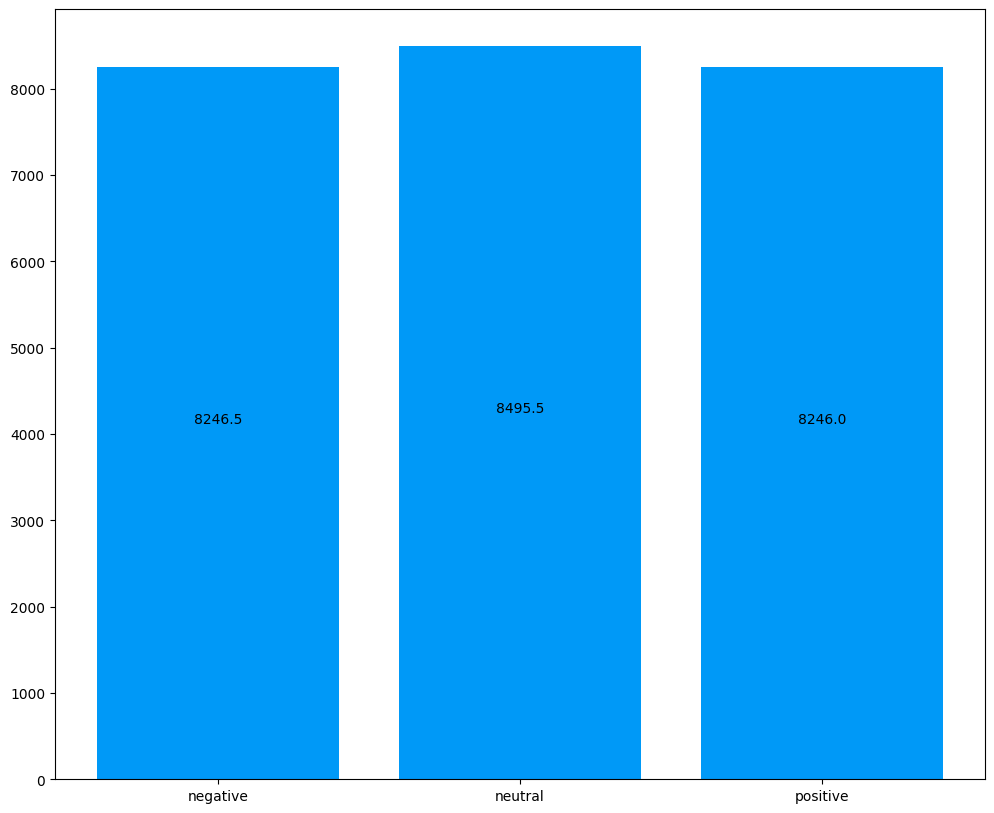

In [113]:
check_reliabilitynew(df)

In [116]:
# check_reliability(df)

In [114]:
df_cats = df[df['category'] == 'Кошки']
df_dogs = df[df['category'] == 'Собаки']
df_cats

,Unnamed: 0,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,price,contacts,favorites,sentiment,activity,sentiment_group,activity_square,sentiment_square,check_gr,sentiment_newgroup
0,0,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,...,5,3,4,1.000000,0.28,positive,0.0784,1.000000,positive,positive
1,1,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,...,655,0,0,0.999089,0.00,positive,0.0000,0.998179,positive,positive
2,2,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,...,0,0,0,0.997077,0.00,positive,0.0000,0.994163,positive,positive
3,3,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,...,-1,1,1,0.997066,0.08,positive,0.0064,0.994141,positive,positive
4,4,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,...,8000,0,0,0.995826,0.00,positive,0.0000,0.991670,positive,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,49968,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",...,3000,1,1,-0.673896,0.08,negative,0.0064,0.454135,negative,negative
49969,49969,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,...,1500,1,3,-0.710234,0.16,negative,0.0256,0.504433,negative,negative
49970,49970,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",...,0,0,1,-0.714857,0.50,negative,0.2500,0.511020,negative,negative
49971,49971,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,...,0,0,0,-0.876198,0.00,negative,0.0000,0.767724,negative,negative


In [179]:
df[df['price'] == 0]

,Unnamed: 0,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,price,contacts,favorites,sentiment,activity,sentiment_group,activity_square,sentiment_square,check_gr,sentiment_newgroup
2,2,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,...,0,0,0,0.997077,0.000000,positive,0.000000,0.994163,positive,positive
6,6,Кошки,25,False,5,Котёнок девочка 4 мес,21,14,2,Красивый окрас,...,0,1,0,0.994940,0.040000,positive,0.001600,0.989905,positive,positive
8,8,Кошки,1,False,1,"Котик 2,5 мес в добрые руки",27,15,2,Отличный парень,...,0,0,0,0.993008,0.000000,positive,0.000000,0.986066,positive,positive
12,12,Кошки,25,False,2,Котёнок,7,50,6,милый котёнок❤️мальчик!\n3 месяца\nв хорошие р...,...,0,1,1,0.984844,0.080000,positive,0.006400,0.969917,positive,positive
14,14,Кошки,25,False,1,Кошечка в добрые руки бесплатно,31,31,5,"3 месяца, лоточек знает отлично",...,0,0,0,0.983474,0.000000,positive,0.000000,0.967220,positive,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49953,49953,Кошки,9,False,1,Кот в добрые руки,17,173,27,"ОТДАМ КОТА СРОЧНО!!! ПОДКИНУЛИ В ПОДЪЕЗД, НЕ Б...",...,0,1,1,-0.560566,0.222222,negative,0.049383,0.314234,negative,negative
49963,49963,Кошки,7,False,5,Кошка,5,225,30,"Симпатичная кошка ищет дом, уже 2 месяца живёт...",...,0,0,1,-0.629927,0.142857,negative,0.020408,0.396808,negative,negative
49970,49970,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",...,0,0,1,-0.714857,0.500000,negative,0.250000,0.511020,negative,negative
49971,49971,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,...,0,0,0,-0.876198,0.000000,negative,0.000000,0.767724,negative,negative


In [180]:
df.isna().sum()

Unnamed: 0                    0
category                      0
days_active                   0
has_video                     0
photo_count                   0
title                         0
title_length                  0
description_length            0
description_word_count        0
DescriptionRu                 0
breed                     34156
gender                        0
age                        8507
price                         0
contacts                      0
favorites                     0
sentiment                     0
activity                      0
sentiment_group               0
activity_square               0
sentiment_square              0
check_gr                      0
sentiment_newgroup            0
dtype: int64

In [115]:
# check_reliability(df_cats)

In [117]:
# check_reliability(df_dogs)

In [118]:
df_free = df[df['price'] == 0]
df_hahapay = df[df['price'] != 0]
df_free

,Unnamed: 0,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,price,contacts,favorites,sentiment,activity,sentiment_group,activity_square,sentiment_square,check_gr,sentiment_newgroup
2,2,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,...,0,0,0,0.997077,0.000000,positive,0.000000,0.994163,positive,positive
6,6,Кошки,25,False,5,Котёнок девочка 4 мес,21,14,2,Красивый окрас,...,0,1,0,0.994940,0.040000,positive,0.001600,0.989905,positive,positive
8,8,Кошки,1,False,1,"Котик 2,5 мес в добрые руки",27,15,2,Отличный парень,...,0,0,0,0.993008,0.000000,positive,0.000000,0.986066,positive,positive
12,12,Кошки,25,False,2,Котёнок,7,50,6,милый котёнок❤️мальчик!\n3 месяца\nв хорошие р...,...,0,1,1,0.984844,0.080000,positive,0.006400,0.969917,positive,positive
14,14,Кошки,25,False,1,Кошечка в добрые руки бесплатно,31,31,5,"3 месяца, лоточек знает отлично",...,0,0,0,0.983474,0.000000,positive,0.000000,0.967220,positive,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49953,49953,Кошки,9,False,1,Кот в добрые руки,17,173,27,"ОТДАМ КОТА СРОЧНО!!! ПОДКИНУЛИ В ПОДЪЕЗД, НЕ Б...",...,0,1,1,-0.560566,0.222222,negative,0.049383,0.314234,negative,negative
49963,49963,Кошки,7,False,5,Кошка,5,225,30,"Симпатичная кошка ищет дом, уже 2 месяца живёт...",...,0,0,1,-0.629927,0.142857,negative,0.020408,0.396808,negative,negative
49970,49970,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",...,0,0,1,-0.714857,0.500000,negative,0.250000,0.511020,negative,negative
49971,49971,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,...,0,0,0,-0.876198,0.000000,negative,0.000000,0.767724,negative,negative


In [143]:
df.columns

Index(['Unnamed: 0', 'category', 'days_active', 'has_video', 'photo_count',
       'title', 'title_length', 'description_length', 'description_word_count',
       'DescriptionRu', 'breed', 'gender', 'age', 'price', 'contacts',
       'favorites', 'sentiment', 'activity', 'sentiment_group',
       'activity_square', 'sentiment_square', 'check_gr',
       'sentiment_newgroup'],
      dtype='object')

In [144]:
df['age'].describe()

count    41466.000000
mean        17.184472
std         29.041944
min          0.000000
25%          3.000000
50%          6.000000
75%         19.150000
max        324.000000
Name: age, dtype: float64

In [147]:
df_young = df[df['age'] <= 6]
df_old = df[df['age'] > 6]


In [135]:
df['title_length'].describe()

count    49973.000000
mean        20.072319
std         10.360676
min          3.000000
25%         13.000000
50%         19.000000
75%         27.000000
max         50.000000
Name: title_length, dtype: float64

In [136]:
df_small = df[df['title_length'] < 20]
df_big = df[df['title_length'] >= 20]

In [119]:
# check_reliability(df_free)

In [120]:

# check_reliability(df_hahapay)

In [121]:
df_male = df[df['gender'] == 'М']
df_female = df[df['gender'] == 'Ж']

In [122]:
# check_reliability(df)

In [123]:
# check_reliability(df_female)

sentiment_newgroup
positive    9980
negative    8888
neutral     8346
Name: count, dtype: int64
Группа positive: p-значение = 7.167689431224224e-111
Группа neutral: p-значение = 3.723383163254115e-105
Группа negative: p-значение = 1.9316828272044806e-106
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 6.882123286166875e-24
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral      positive
negative  1.000000e+00  1.439275e-15  2.051343e-21
neutral   1.439275e-15  1.000000e+00  7.950974e-01
positive  2.051343e-21  7.950974e-01  1.000000e+00
Ранговое среднее для группы negative: 4444.5
Ранговое среднее для группы neutral: 4173.5
Ранговое среднее для группы positive: 4990.5


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9980.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8346.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8888.
  res = hypotest_fun_out(*samples, **kwds)


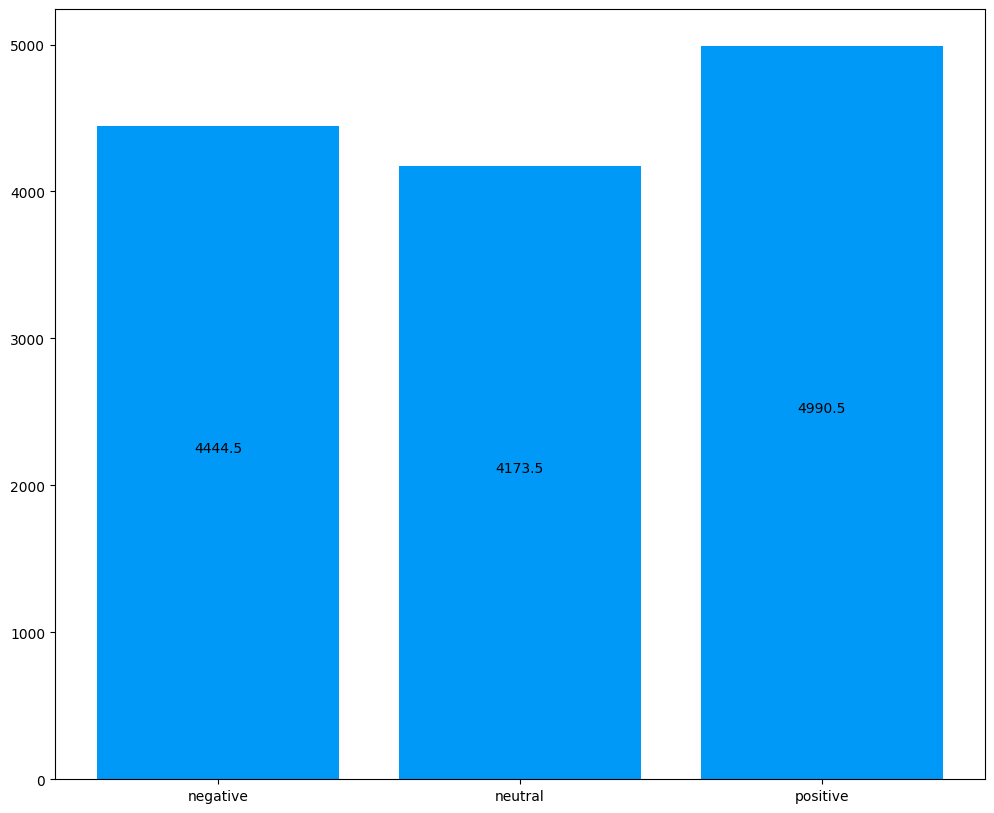

In [124]:
check_reliabilitynew(df_cats)

sentiment_newgroup
neutral     8644
negative    7604
positive    6511
Name: count, dtype: int64
Группа positive: p-значение = 6.652370734083799e-97
Группа neutral: p-значение = 5.2736576706006446e-104
Группа negative: p-значение = 3.3633288522831285e-100
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 2.82327899784266e-23
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral      positive
negative  1.000000e+00  1.331037e-23  2.010885e-04
neutral   1.331037e-23  1.000000e+00  6.593865e-08
positive  2.010885e-04  6.593865e-08  1.000000e+00
Ранговое среднее для группы negative: 3802.5
Ранговое среднее для группы neutral: 4322.5
Ранговое среднее для группы positive: 3256.0


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6511.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8644.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7604.
  res = hypotest_fun_out(*samples, **kwds)


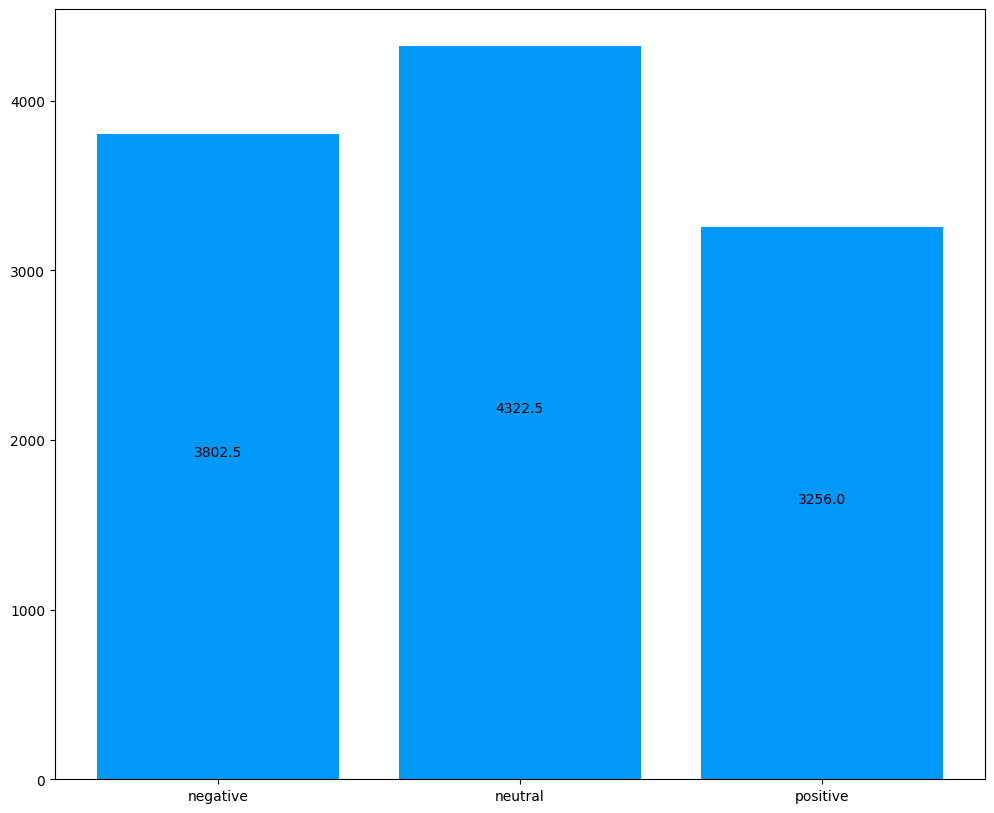

In [125]:
check_reliabilitynew(df_dogs)

sentiment_newgroup
negative    7115
positive    6351
neutral     5927
Name: count, dtype: int64
Группа positive: p-значение = 6.88964348442372e-99
Группа neutral: p-значение = 7.388199367935544e-97
Группа negative: p-значение = 1.759315049747721e-100
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 3.429551561152327e-05
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
          negative  neutral  positive
negative   1.00000    1.000   0.00004
neutral    1.00000    1.000   0.00300
positive   0.00004    0.003   1.00000
Ранговое среднее для группы negative: 3558.0
Ранговое среднее для группы neutral: 2964.0
Ранговое среднее для группы positive: 3176.0


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6351.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5927.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7115.
  res = hypotest_fun_out(*samples, **kwds)


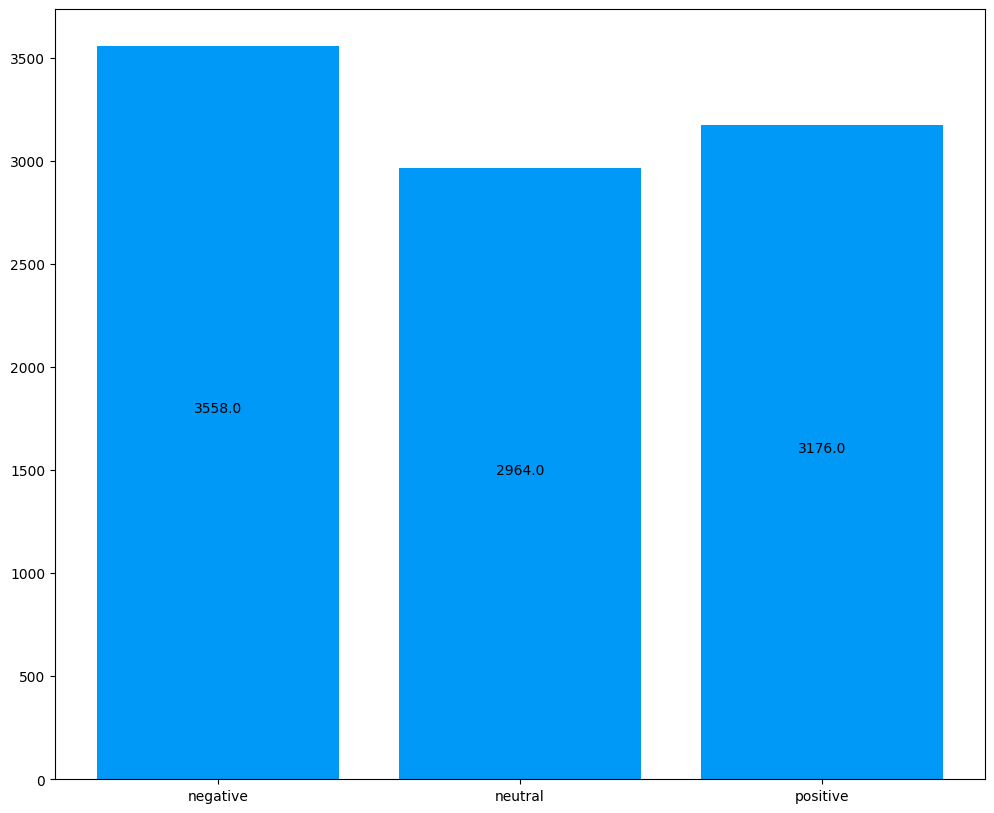

In [126]:
check_reliabilitynew(df_free)

sentiment_newgroup
neutral     11063
positive    10140
negative     9377
Name: count, dtype: int64
Группа positive: p-значение = 5.268567936173759e-109
Группа neutral: p-значение = 6.604511493386615e-110
Группа negative: p-значение = 3.005208534306173e-106
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 3.3140939048895465e-44
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral      positive
negative  1.000000e+00  1.397354e-44  7.683001e-10
neutral   1.397354e-44  1.000000e+00  1.979197e-14
positive  7.683001e-10  1.979197e-14  1.000000e+00
Ранговое среднее для группы negative: 4689.0
Ранговое среднее для группы neutral: 5532.0
Ранговое среднее для группы positive: 5070.5


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10140.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11063.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9377.
  res = hypotest_fun_out(*samples, **kwds)


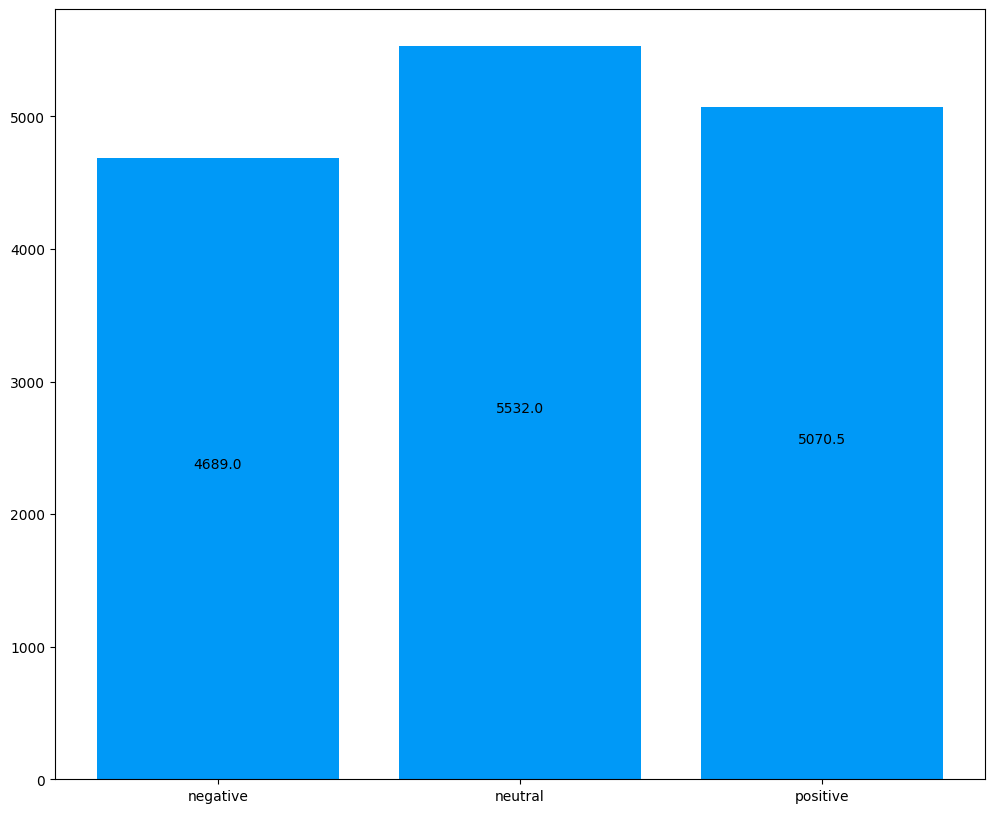

In [127]:
check_reliabilitynew(df_hahapay)

In [132]:
df_photos = df[df['photo_count'] < 4]
df_more_photos = df[df['photo_count'] >= 4]

sentiment_newgroup
positive    9565
neutral     9536
negative    9091
Name: count, dtype: int64
Группа positive: p-значение = 2.1271362879538386e-108
Группа neutral: p-значение = 2.6775331166060117e-108
Группа negative: p-значение = 7.423011516816709e-106
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 3.1791870200301663e-19
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral      positive
negative  1.000000e+00  3.805835e-19  2.443023e-09
neutral   3.805835e-19  1.000000e+00  9.130412e-03
positive  2.443023e-09  9.130412e-03  1.000000e+00
Ранговое среднее для группы negative: 4546.0
Ранговое среднее для группы neutral: 4768.5
Ранговое среднее для группы positive: 4783.0


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9565.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9536.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9091.
  res = hypotest_fun_out(*samples, **kwds)


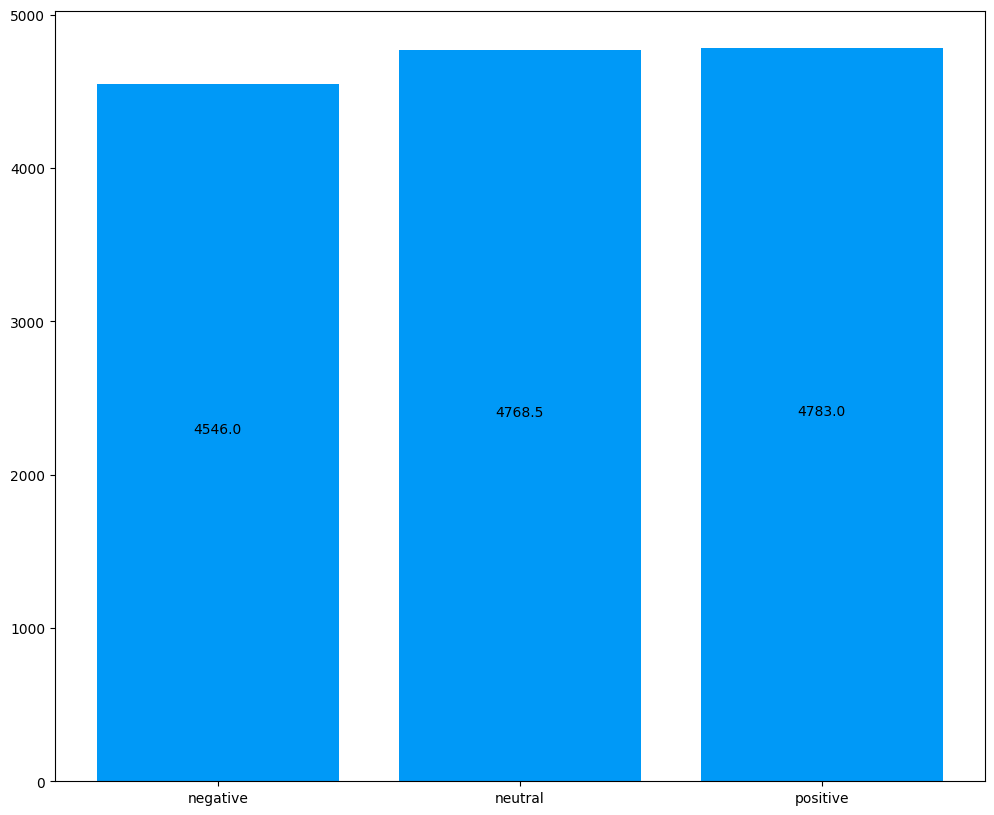

In [133]:
check_reliabilitynew(df_photos)

sentiment_newgroup
neutral     7454
negative    7401
positive    6926
Name: count, dtype: int64
Группа positive: p-значение = 3.27679679592527e-100
Группа neutral: p-значение = 5.470273776062776e-100
Группа negative: p-значение = 7.627492717422472e-101
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 6.503505485894548e-27
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral      positive
negative  1.000000e+00  1.753096e-27  6.924476e-09
neutral   1.753096e-27  1.000000e+00  4.929932e-06
positive  6.924476e-09  4.929932e-06  1.000000e+00
Ранговое среднее для группы negative: 3701.0
Ранговое среднее для группы neutral: 3727.5
Ранговое среднее для группы positive: 3463.5


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6926.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7454.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7401.
  res = hypotest_fun_out(*samples, **kwds)


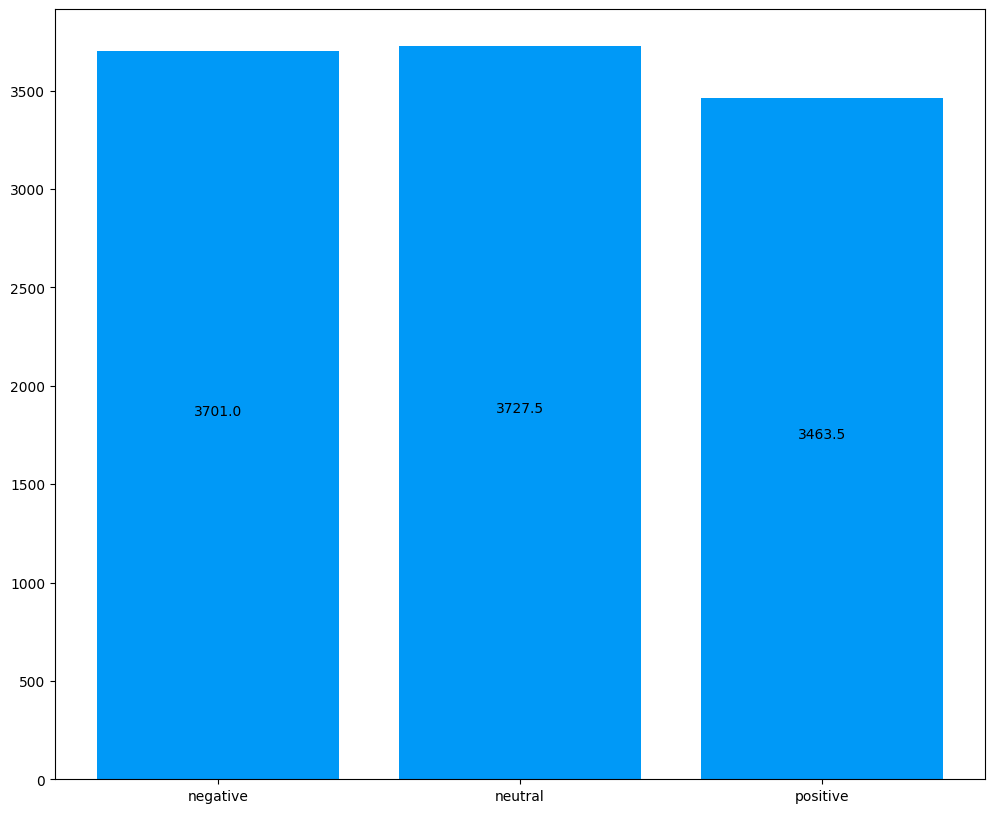

In [134]:
check_reliabilitynew(df_more_photos)

sentiment_newgroup
positive    8556
neutral     8526
negative    7654
Name: count, dtype: int64
Группа positive: p-значение = 2.5735009424050477e-103
Группа neutral: p-значение = 2.0027029734529813e-104
Группа negative: p-значение = 8.855432919263148e-101
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 1.0341235619240807e-26
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral      positive
negative  1.000000e+00  2.148961e-25  1.618408e-15
neutral   2.148961e-25  1.000000e+00  3.807182e-02
positive  1.618408e-15  3.807182e-02  1.000000e+00
Ранговое среднее для группы negative: 3827.5
Ранговое среднее для группы neutral: 4263.5
Ранговое среднее для группы positive: 4278.5


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8556.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8526.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7654.
  res = hypotest_fun_out(*samples, **kwds)


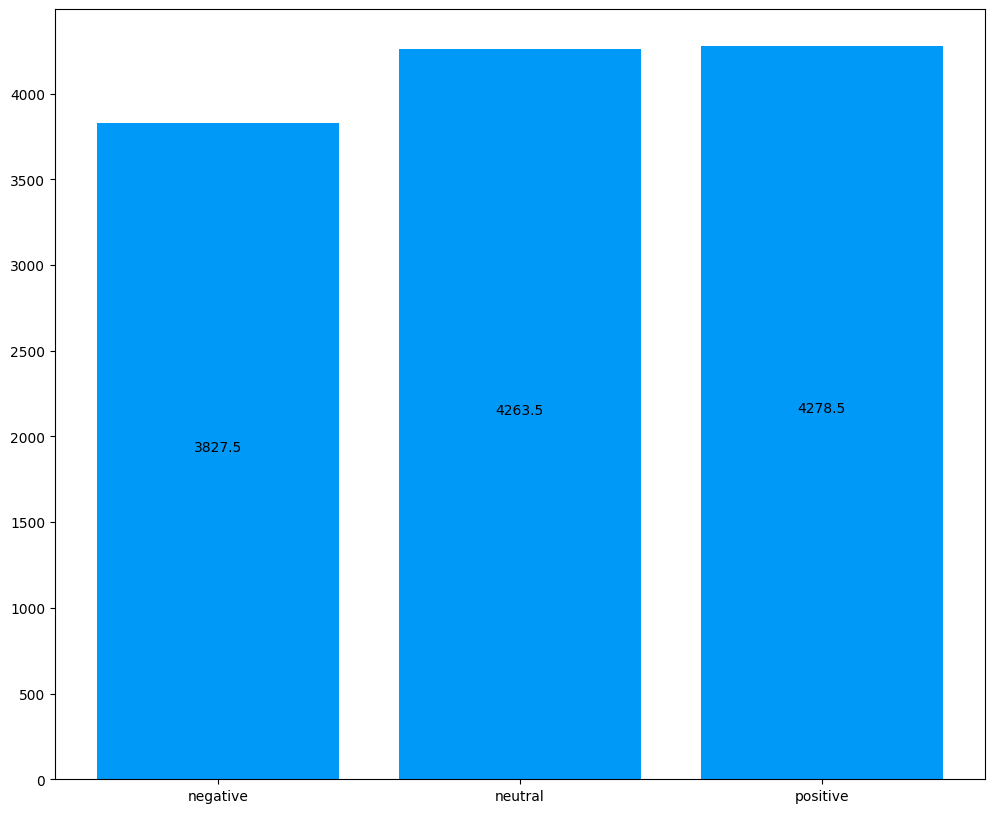

In [128]:
check_reliabilitynew(df_male)

sentiment_newgroup
negative    8838
neutral     8464
positive    7935
Name: count, dtype: int64
Группа positive: p-значение = 5.794208276559836e-105
Группа neutral: p-значение = 1.523599288816663e-104
Группа negative: p-значение = 6.122601713064127e-106
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 1.1107579968207078e-18
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral      positive
negative  1.000000e+00  5.347879e-19  2.213482e-03
neutral   5.347879e-19  1.000000e+00  1.560479e-07
positive  2.213482e-03  1.560479e-07  1.000000e+00
Ранговое среднее для группы negative: 4419.5
Ранговое среднее для группы neutral: 4232.5
Ранговое среднее для группы positive: 3968.0


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7935.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8464.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8838.
  res = hypotest_fun_out(*samples, **kwds)


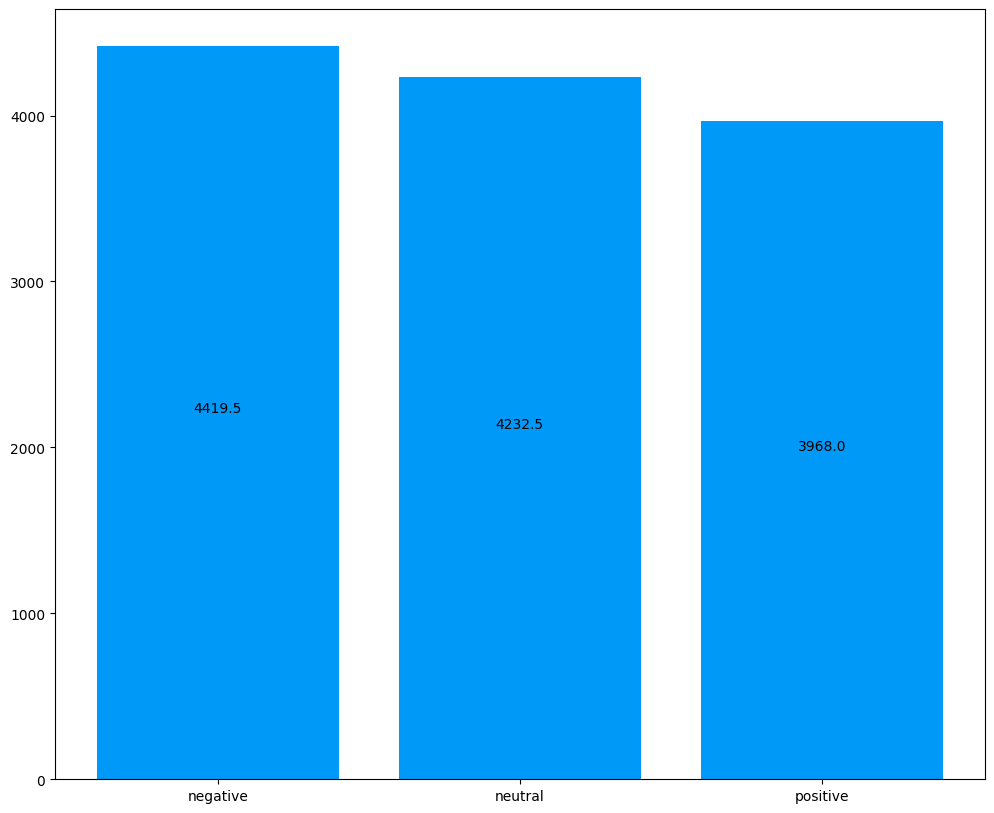

In [129]:
check_reliabilitynew(df_female)

sentiment_newgroup
neutral     8815
positive    8251
negative    8081
Name: count, dtype: int64
Группа positive: p-значение = 1.0440384383278534e-102
Группа neutral: p-значение = 5.475360784854217e-106
Группа negative: p-значение = 1.040589241477306e-102
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 7.628670209284871e-31
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral      positive
negative  1.000000e+00  1.700495e-31  4.002335e-10
neutral   1.700495e-31  1.000000e+00  4.102194e-07
positive  4.002335e-10  4.102194e-07  1.000000e+00
Ранговое среднее для группы negative: 4041.0
Ранговое среднее для группы neutral: 4408.0
Ранговое среднее для группы positive: 4126.0


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8251.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8815.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8081.
  res = hypotest_fun_out(*samples, **kwds)


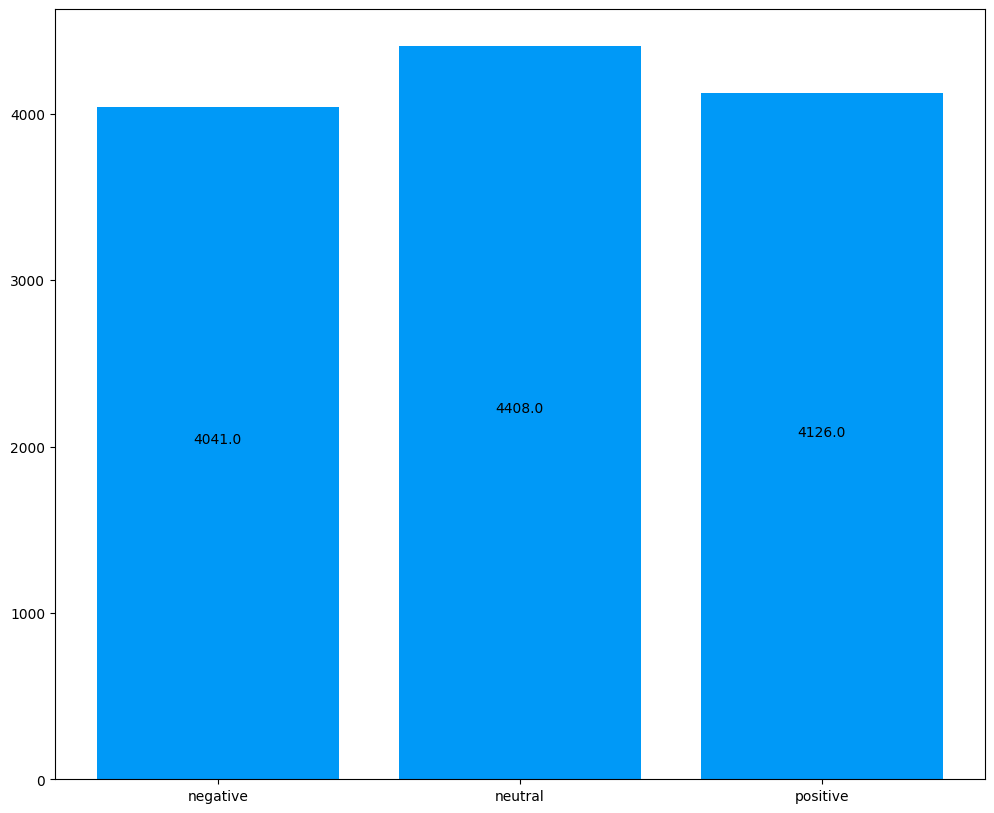

In [137]:
check_reliabilitynew(df_small)

sentiment_newgroup
negative    8411
positive    8240
neutral     8175
Name: count, dtype: int64
Группа positive: p-значение = 1.2021471006604817e-105
Группа neutral: p-значение = 6.764271884615578e-103
Группа negative: p-значение = 3.4965655623186856e-104
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 2.8006077496696984e-15
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral      positive
negative  1.000000e+00  6.400492e-15  4.173358e-08
neutral   6.400492e-15  1.000000e+00  7.170825e-02
positive  4.173358e-08  7.170825e-02  1.000000e+00
Ранговое среднее для группы negative: 4206.0
Ранговое среднее для группы neutral: 4088.0
Ранговое среднее для группы positive: 4120.5


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8240.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8175.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8411.
  res = hypotest_fun_out(*samples, **kwds)


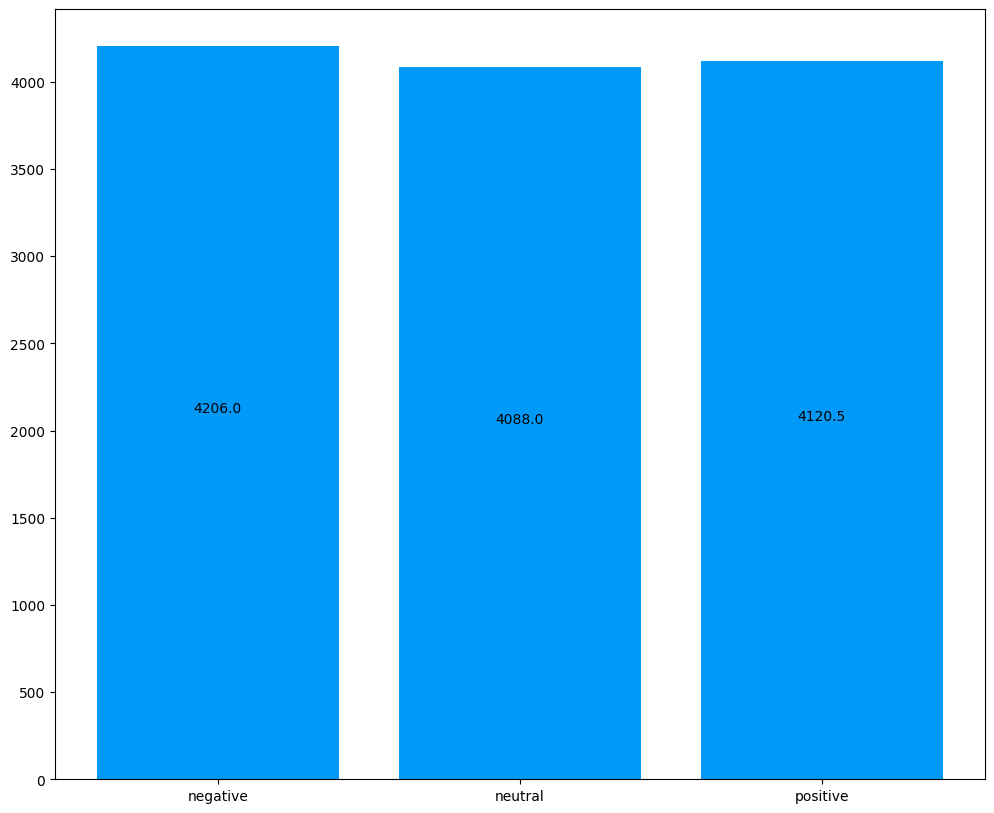

In [138]:
check_reliabilitynew(df_big)

sentiment_newgroup
positive    9366
neutral     7796
negative    5369
Name: count, dtype: int64
Группа positive: p-значение = 1.716311893162625e-108
Группа neutral: p-значение = 1.4979124116195486e-101
Группа negative: p-значение = 9.124668336688398e-92
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 6.53181420183178e-13
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral      positive
negative  1.000000e+00  1.612859e-12  1.364753e-02
neutral   1.612859e-12  1.000000e+00  6.701517e-07
positive  1.364753e-02  6.701517e-07  1.000000e+00
Ранговое среднее для группы negative: 2685.0
Ранговое среднее для группы neutral: 3898.5
Ранговое среднее для группы positive: 4683.5


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9366.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7796.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5369.
  res = hypotest_fun_out(*samples, **kwds)


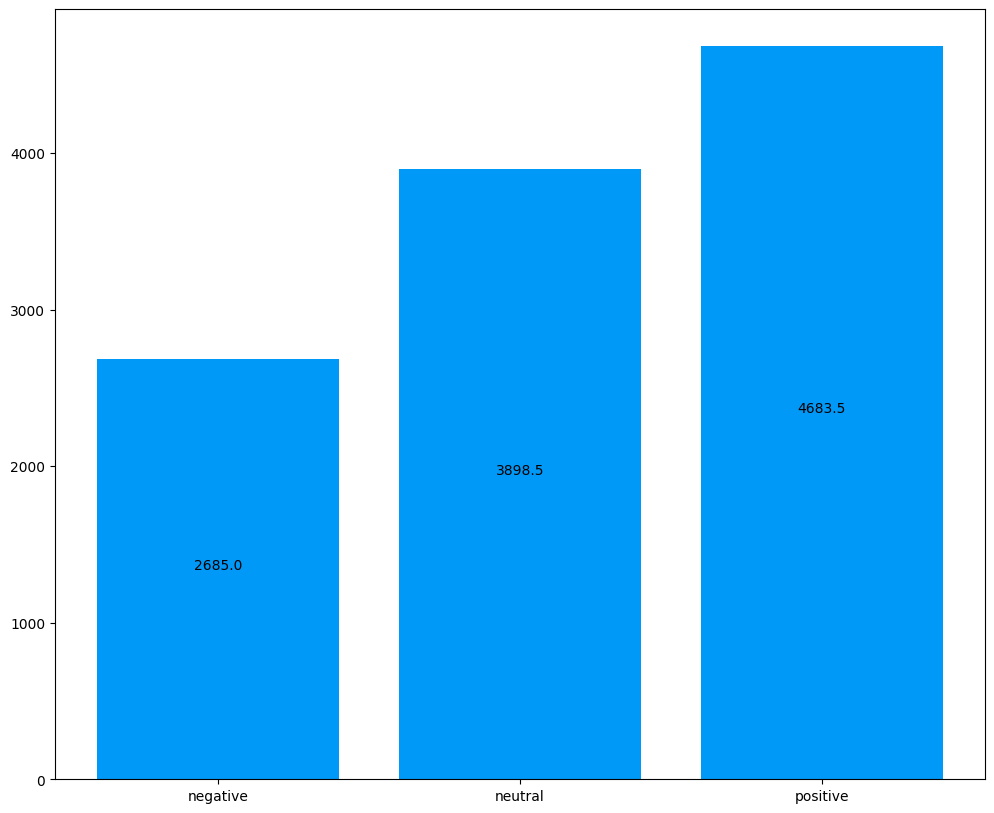

In [148]:
check_reliabilitynew(df_young)

sentiment_newgroup
negative    8654
neutral     5742
positive    4539
Name: count, dtype: int64
Группа positive: p-значение = 1.3548047524344713e-90
Группа neutral: p-значение = 2.346486881700843e-96
Группа negative: p-значение = 5.301135146219288e-106
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 0.0019776086165446604
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
          negative   neutral  positive
negative  1.000000  1.000000  0.004366
neutral   1.000000  1.000000  0.005093
positive  0.004366  0.005093  1.000000
Ранговое среднее для группы negative: 4327.5
Ранговое среднее для группы neutral: 2871.5
Ранговое среднее для группы positive: 2270.0


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5742.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8654.
  res = hypotest_fun_out(*samples, **kwds)


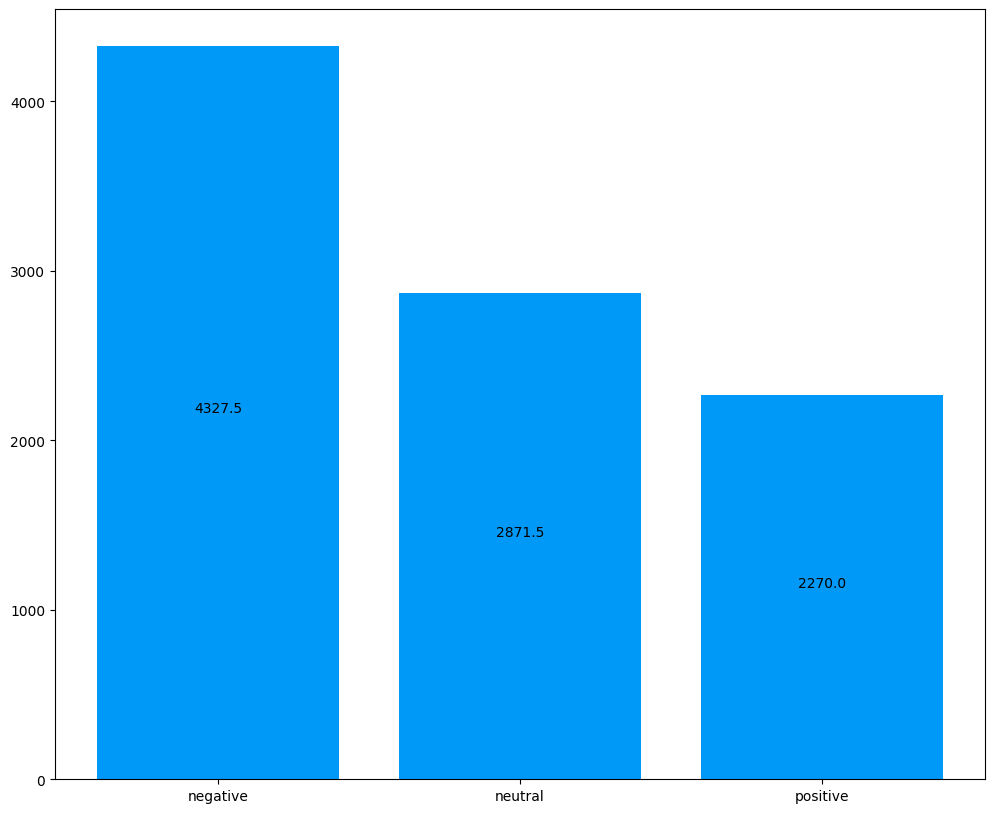

In [149]:
check_reliabilitynew(df_old)

In [150]:
df

,Unnamed: 0,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,price,contacts,favorites,sentiment,activity,sentiment_group,activity_square,sentiment_square,check_gr,sentiment_newgroup
0,0,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,...,5,3,4,1.000000,0.28,positive,0.0784,1.000000,positive,positive
1,1,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,...,655,0,0,0.999089,0.00,positive,0.0000,0.998179,positive,positive
2,2,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,...,0,0,0,0.997077,0.00,positive,0.0000,0.994163,positive,positive
3,3,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,...,-1,1,1,0.997066,0.08,positive,0.0064,0.994141,positive,positive
4,4,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,...,8000,0,0,0.995826,0.00,positive,0.0000,0.991670,positive,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,49968,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",...,3000,1,1,-0.673896,0.08,negative,0.0064,0.454135,negative,negative
49969,49969,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,...,1500,1,3,-0.710234,0.16,negative,0.0256,0.504433,negative,negative
49970,49970,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",...,0,0,1,-0.714857,0.50,negative,0.2500,0.511020,negative,negative
49971,49971,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,...,0,0,0,-0.876198,0.00,negative,0.0000,0.767724,negative,negative


# Проверка

In [ ]:
import pandas as pd


sentiment_group
neutral     24981
positive    12498
negative    12494
Name: count, dtype: int64
Группа positive: p-значение = 9.009429123921411e-117
Группа neutral: p-значение = 3.97481810006514e-135
Группа negative: p-значение = 1.7952798979567593e-115
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 7.533136376375139e-51
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral      positive
negative  1.000000e+00  1.625689e-51  1.480807e-20
neutral   1.625689e-51  1.000000e+00  4.953415e-05
positive  1.480807e-20  4.953415e-05  1.000000e+00
Ранговое среднее для группы negative: 6247.5
Ранговое среднее для группы neutral: 12491.0
Ранговое среднее для группы positive: 6249.5


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12498.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 24981.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12494.
  res = hypotest_fun_out(*samples, **kwds)


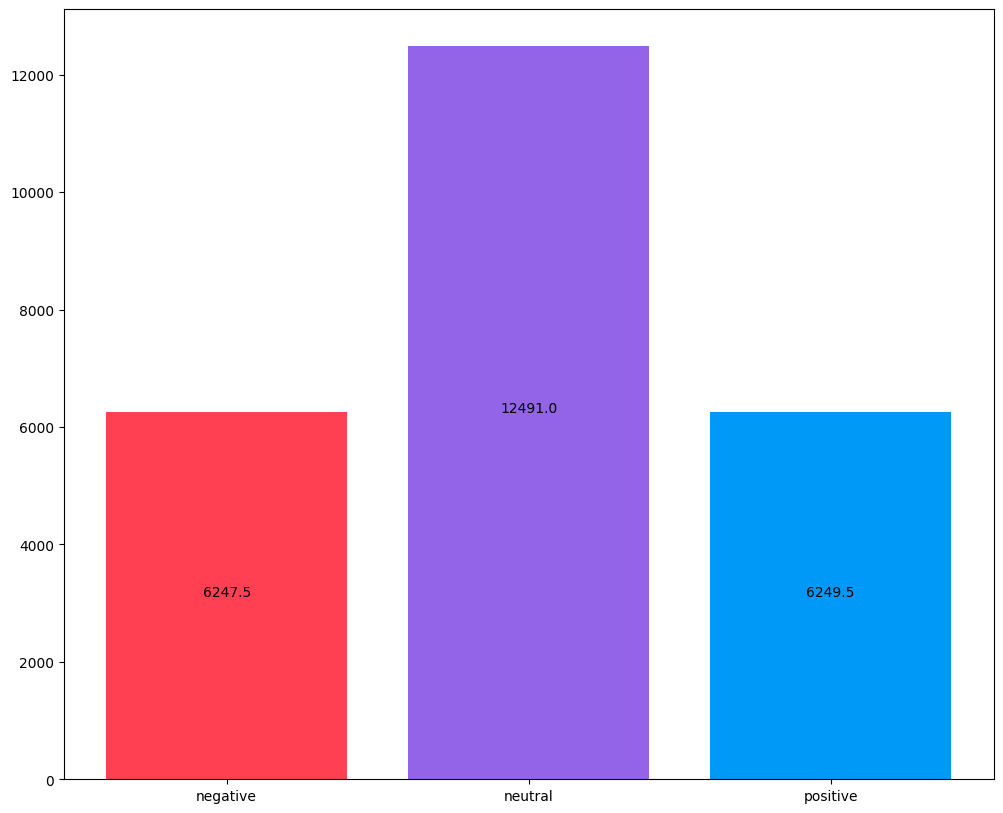

In [15]:
check_reliability(df)

sentiment_group
neutral     12442
positive     7793
negative     6979
Name: count, dtype: int64
Группа positive: p-значение = 3.3328225112454944e-104
Группа neutral: p-значение = 4.6996287081095145e-116
Группа negative: p-значение = 6.20378129029855e-100
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 1.9659456059897353e-22
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral      positive
negative  1.000000e+00  1.590215e-17  2.448826e-19
neutral   1.590215e-17  1.000000e+00  4.473982e-01
positive  2.448826e-19  4.473982e-01  1.000000e+00
Ранговое среднее для группы negative: 3490.0
Ранговое среднее для группы neutral: 6221.5
Ранговое среднее для группы positive: 3897.0


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7793.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12442.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6979.
  res = hypotest_fun_out(*samples, **kwds)


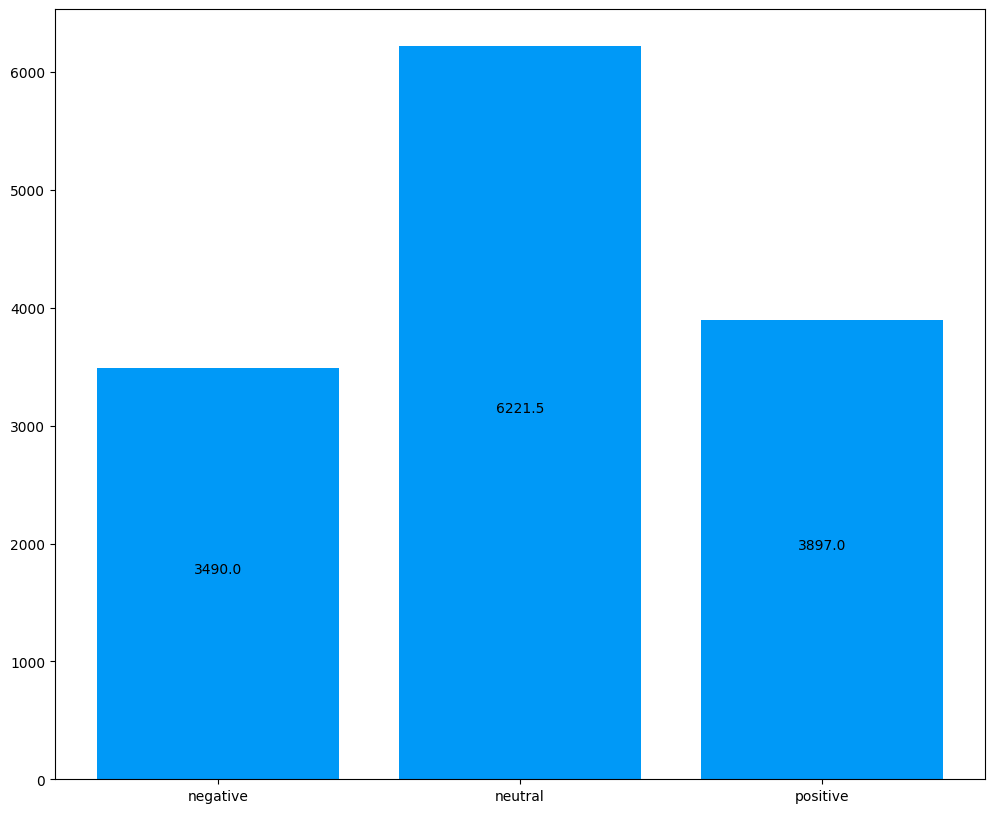

In [164]:
check_reliability(df_cats)

sentiment_group
neutral     12539
negative     5515
positive     4705
Name: count, dtype: int64
Группа positive: p-значение = 8.518152063871147e-89
Группа neutral: p-значение = 4.891981904036026e-114
Группа negative: p-значение = 4.588361944664398e-92
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 9.53760430366348e-27
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral      positive
negative  1.000000e+00  3.338364e-27  2.474257e-07
neutral   3.338364e-27  1.000000e+00  1.347294e-04
positive  2.474257e-07  1.347294e-04  1.000000e+00
Ранговое среднее для группы negative: 2758.0
Ранговое среднее для группы neutral: 6270.0
Ранговое среднее для группы positive: 2353.0


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12539.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5515.
  res = hypotest_fun_out(*samples, **kwds)


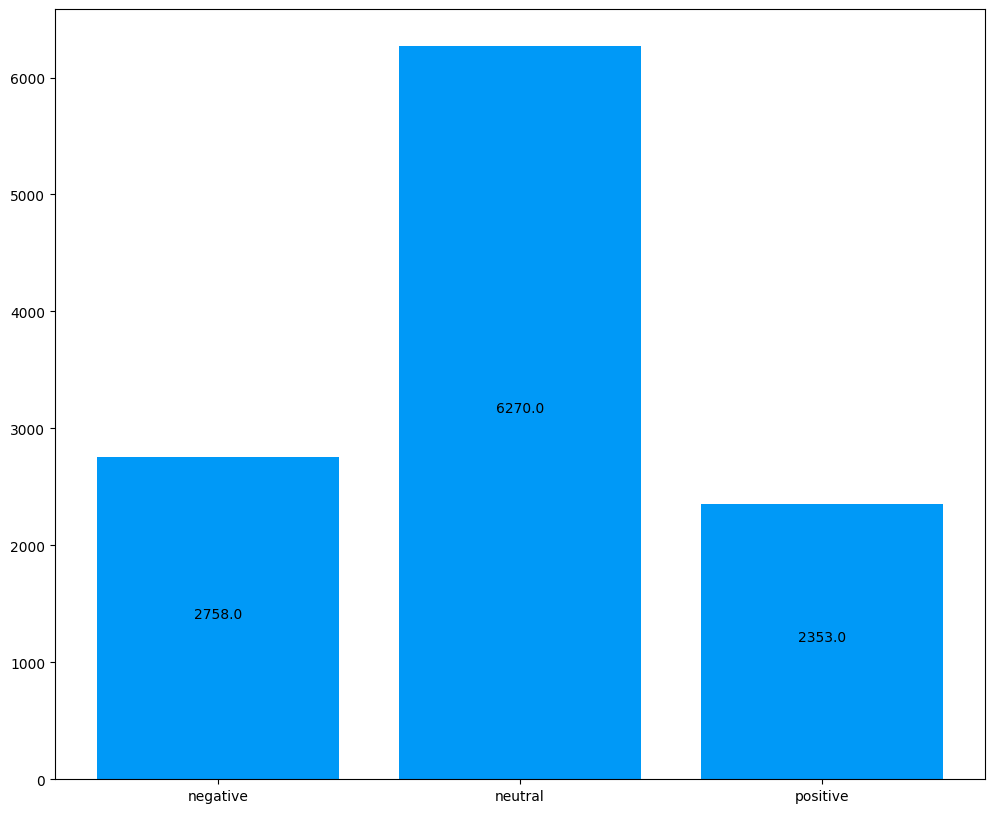

In [165]:
check_reliability(df_dogs)

sentiment_group
neutral     8970
negative    5567
positive    4856
Name: count, dtype: int64
Группа positive: p-значение = 7.087310234025369e-92
Группа neutral: p-значение = 5.539886660205609e-108
Группа negative: p-значение = 5.674211079508335e-94
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 1.002081262120395e-05
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
          negative   neutral  positive
negative  1.000000  0.980347  0.000021
neutral   0.980347  1.000000  0.000182
positive  0.000021  0.000182  1.000000
Ранговое среднее для группы negative: 2784.0
Ранговое среднее для группы neutral: 4485.5
Ранговое среднее для группы positive: 2428.5


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8970.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5567.
  res = hypotest_fun_out(*samples, **kwds)


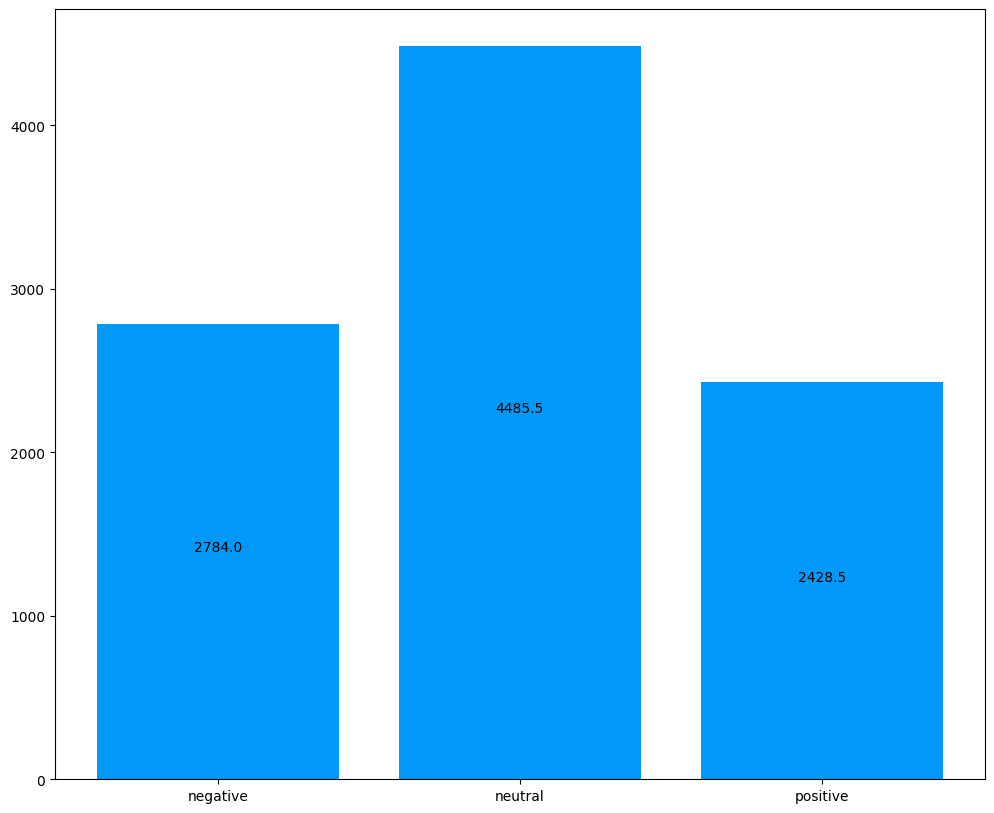

In [166]:
check_reliability(df_free)

sentiment_group
neutral     16011
positive     7642
negative     6927
Name: count, dtype: int64
Группа positive: p-значение = 1.3057657491039383e-101
Группа neutral: p-значение = 2.5371779487727204e-120
Группа negative: p-значение = 1.8241131057041786e-98
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 1.3036107823440817e-55
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral      positive
negative  1.000000e+00  4.605141e-55  1.885358e-13
neutral   4.605141e-55  1.000000e+00  9.511754e-13
positive  1.885358e-13  9.511754e-13  1.000000e+00
Ранговое среднее для группы negative: 3464.0
Ранговое среднее для группы neutral: 8006.0
Ранговое среднее для группы positive: 3821.5


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7642.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16011.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6927.
  res = hypotest_fun_out(*samples, **kwds)


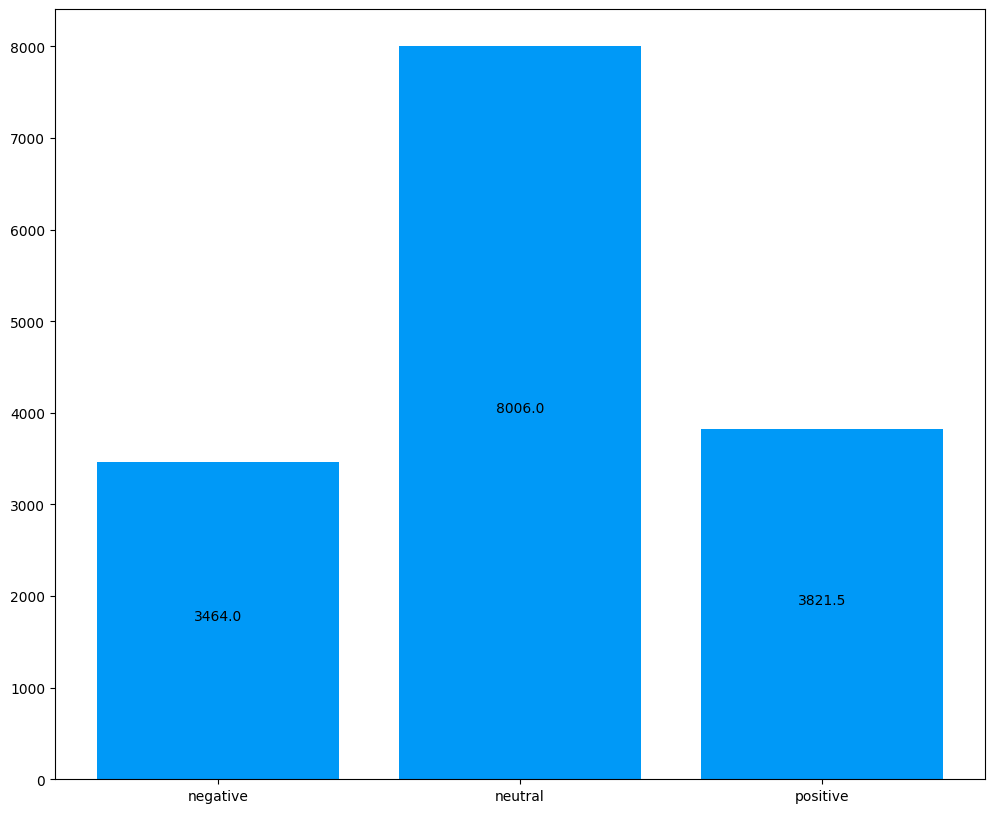

In [167]:
check_reliability(df_hahapay)

sentiment_group
neutral     11433
positive     7258
negative     3840
Name: count, dtype: int64
Группа positive: p-значение = 8.502269798340975e-102
Группа neutral: p-значение = 6.417043568004691e-112
Группа negative: p-значение = 8.010701587847829e-84
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 4.086100294534259e-17
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral      positive
negative  1.000000e+00  2.481018e-15  2.910329e-03
neutral   2.481018e-15  1.000000e+00  5.795228e-08
positive  2.910329e-03  5.795228e-08  1.000000e+00
Ранговое среднее для группы negative: 1920.5
Ранговое среднее для группы neutral: 5717.0
Ранговое среднее для группы positive: 3629.5


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7258.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11433.
  res = hypotest_fun_out(*samples, **kwds)


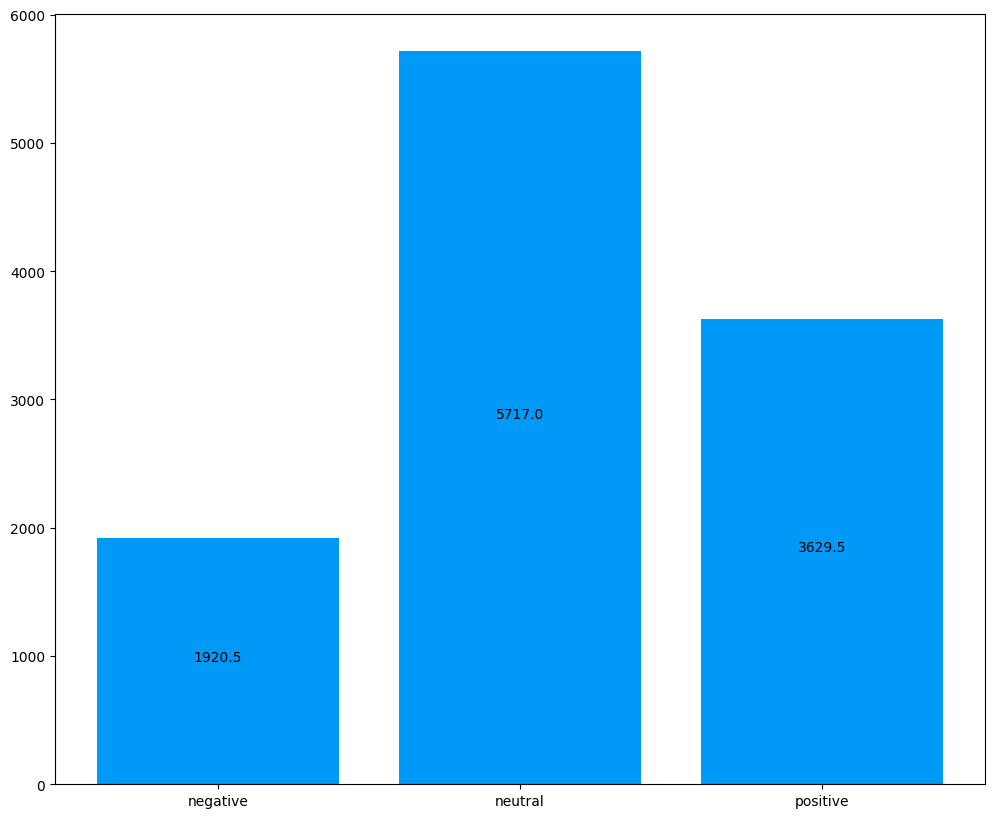

In [168]:
check_reliability(df_young)

sentiment_group
neutral     8763
negative    6881
positive    3291
Name: count, dtype: int64
Группа positive: p-значение = 9.088115321791481e-83
Группа neutral: p-значение = 1.198404487406723e-107
Группа negative: p-значение = 1.1819767177893053e-99
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 0.03925332034587526
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
          negative   neutral  positive
negative  1.000000  1.000000  0.066405
neutral   1.000000  1.000000  0.049391
positive  0.066405  0.049391  1.000000
Ранговое среднее для группы negative: 3441.0
Ранговое среднее для группы neutral: 4382.0
Ранговое среднее для группы positive: 1646.0


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8763.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6881.
  res = hypotest_fun_out(*samples, **kwds)


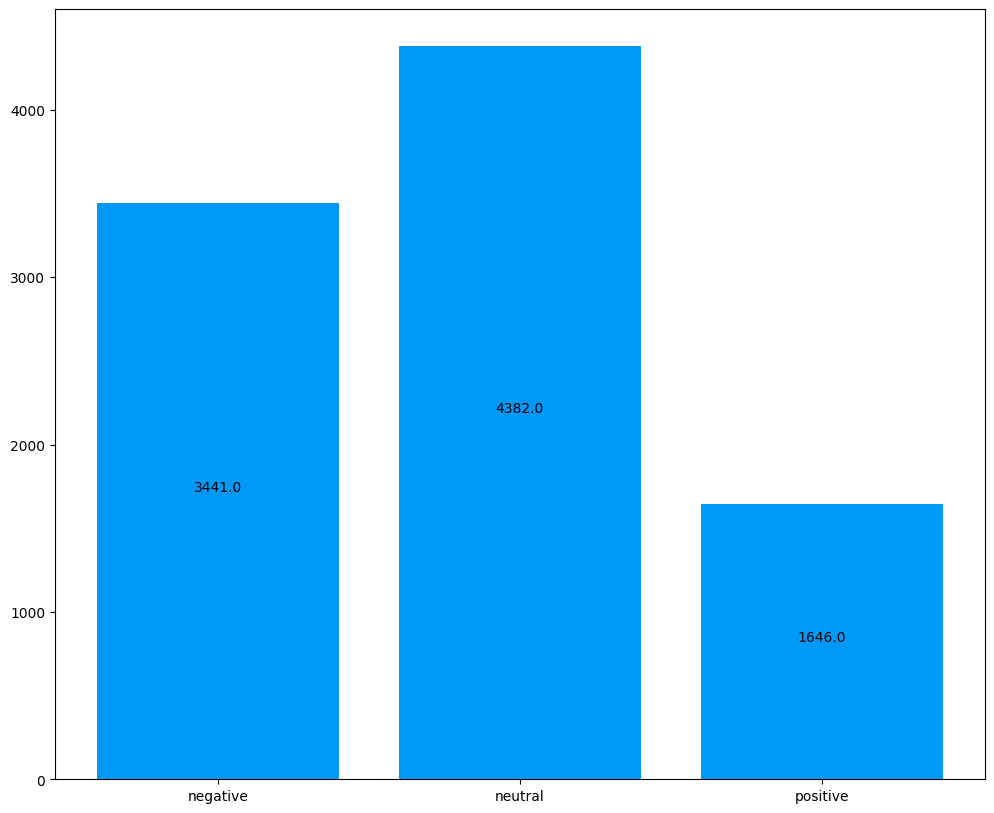

In [169]:
check_reliability(df_old)

sentiment_group
neutral     12357
negative     6834
positive     6046
Name: count, dtype: int64
Группа positive: p-значение = 6.03921836888352e-98
Группа neutral: p-значение = 1.0308923422563203e-114
Группа negative: p-значение = 2.4800476964900296e-99
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 1.8339015703541805e-26
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral      positive
negative  1.000000e+00  4.125541e-26  1.409351e-04
neutral   4.125541e-26  1.000000e+00  4.237102e-08
positive  1.409351e-04  4.237102e-08  1.000000e+00
Ранговое среднее для группы negative: 3417.5
Ранговое среднее для группы neutral: 6179.0
Ранговое среднее для группы positive: 3023.5


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6046.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12357.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6834.
  res = hypotest_fun_out(*samples, **kwds)


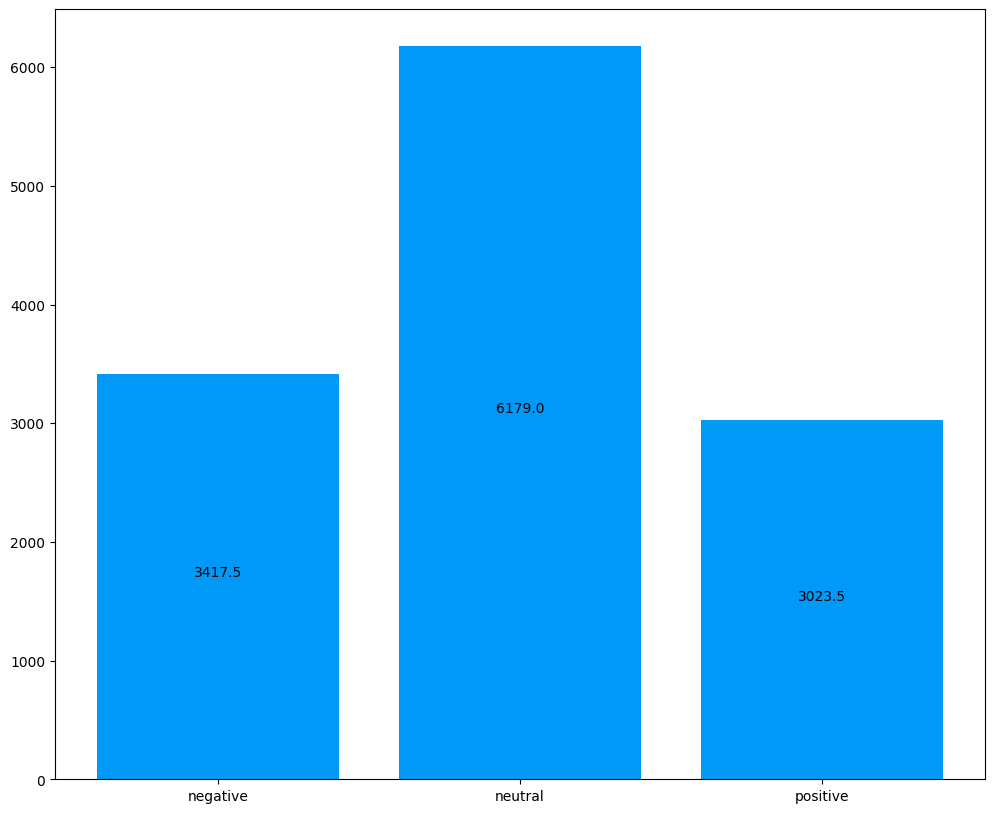

In [170]:
check_reliability(df_female)

sentiment_group
neutral     12624
positive     6452
negative     5660
Name: count, dtype: int64
Группа positive: p-значение = 2.0161325814862864e-95
Группа neutral: p-значение = 3.3305122838890157e-115
Группа negative: p-значение = 6.931841524470225e-93
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 1.600904009202183e-25
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral      positive
negative  1.000000e+00  2.286335e-24  4.535274e-17
neutral   2.286335e-24  1.000000e+00  1.000000e+00
positive  4.535274e-17  1.000000e+00  1.000000e+00
Ранговое среднее для группы negative: 2830.5
Ранговое среднее для группы neutral: 6312.5
Ранговое среднее для группы positive: 3226.5


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6452.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12624.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5660.
  res = hypotest_fun_out(*samples, **kwds)


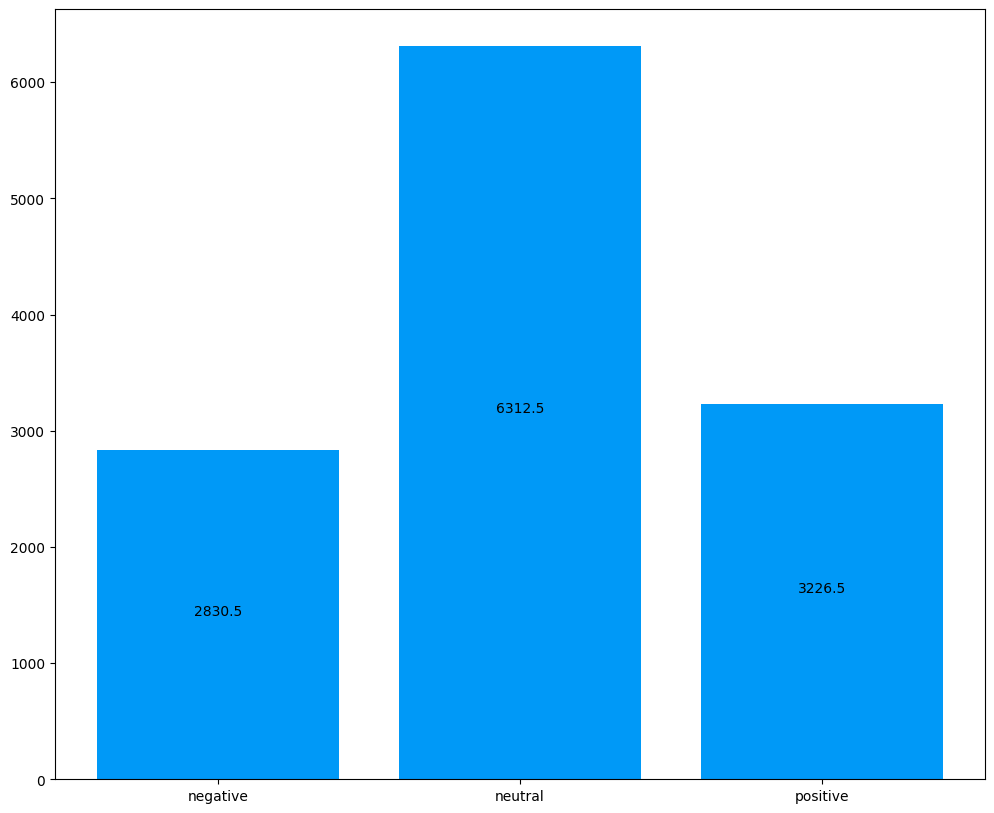

In [171]:
check_reliability(df_male)

sentiment_group
neutral     12766
positive     6321
negative     6060
Name: count, dtype: int64
Группа positive: p-значение = 2.2604364208521093e-95
Группа neutral: p-значение = 5.536852934915087e-116
Группа negative: p-значение = 2.8874900817023584e-95
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 1.3058457571790733e-33
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral      positive
negative  1.000000e+00  3.944934e-34  3.191396e-10
neutral   3.944934e-34  1.000000e+00  2.924686e-06
positive  3.191396e-10  2.924686e-06  1.000000e+00
Ранговое среднее для группы negative: 3030.5
Ранговое среднее для группы neutral: 6383.5
Ранговое среднее для группы positive: 3161.0


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6321.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12766.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6060.
  res = hypotest_fun_out(*samples, **kwds)


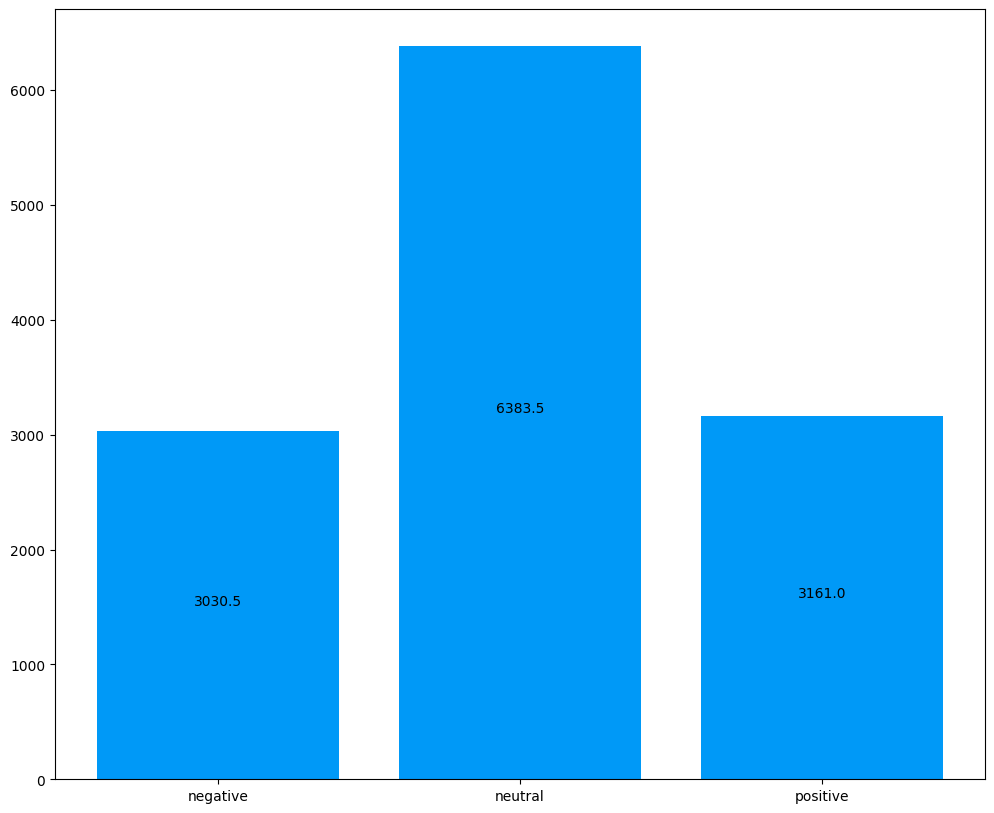

In [172]:
check_reliability(df_small)

sentiment_group
neutral     12215
negative     6434
positive     6177
Name: count, dtype: int64
Группа positive: p-значение = 4.252293827276533e-98
Группа neutral: p-значение = 6.88172805168805e-114
Группа negative: p-значение = 3.078375139751418e-97
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 1.4284908723178383e-19
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral      positive
negative  1.000000e+00  3.480698e-19  1.779585e-11
neutral   3.480698e-19  1.000000e+00  8.134291e-01
positive  1.779585e-11  8.134291e-01  1.000000e+00
Ранговое среднее для группы negative: 3217.5
Ранговое среднее для группы neutral: 6108.0
Ранговое среднее для группы positive: 3089.0


/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6177.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12215.
  res = hypotest_fun_out(*samples, **kwds)
/Users/mac/Desktop/учеба/проект/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6434.
  res = hypotest_fun_out(*samples, **kwds)


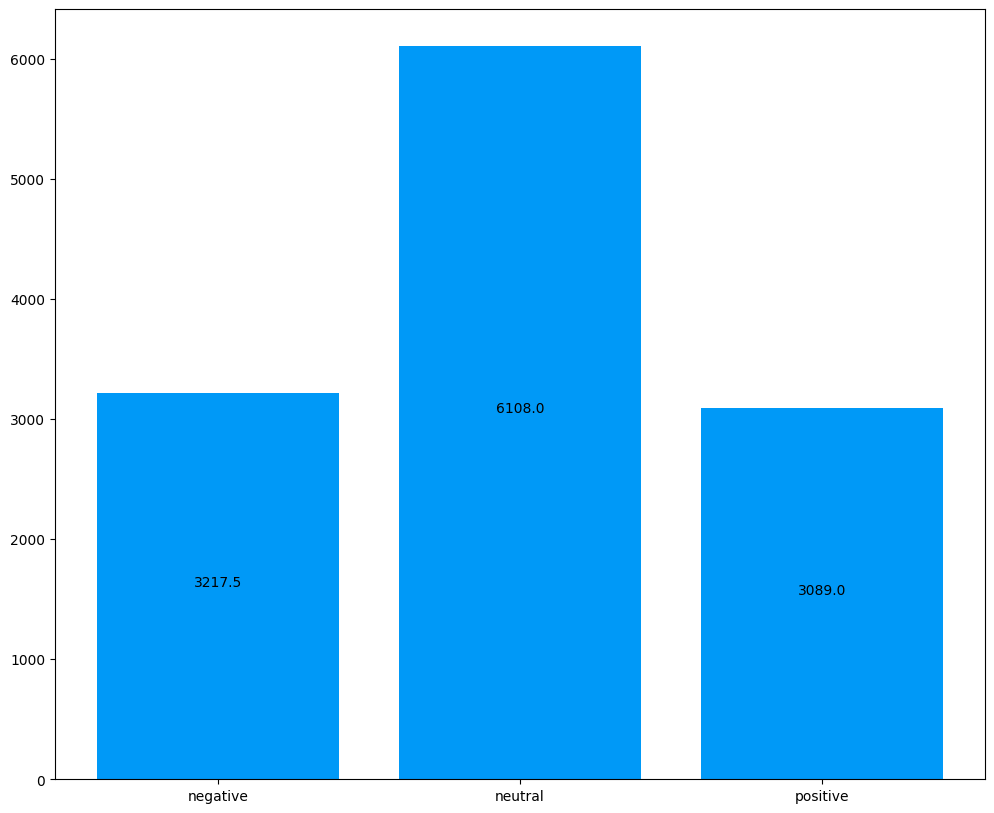

In [173]:
check_reliability(df_big)